In [16]:
import sys
sys.path.insert(0, '../scripts')

import direction_transition as dit
from preprocessing import get_all_sheet_names, read_excel_by_sheet
ctrl_path = '../reversal_ctrl.xlsx'
cask_path = '../reversal_cask.xlsx'
ctrl_sheets = get_all_sheet_names(ctrl_path)
cask_sheets = get_all_sheet_names(cask_path)
from intervals import mean_pellet_collect_time, plot_retrieval_time_by_block, perform_T_test
from meals import graph_group_stats

action_prop = 0.75
block_prop = 0.6
meal_config=[60, 2]
result_prop = 0.25
day = 3

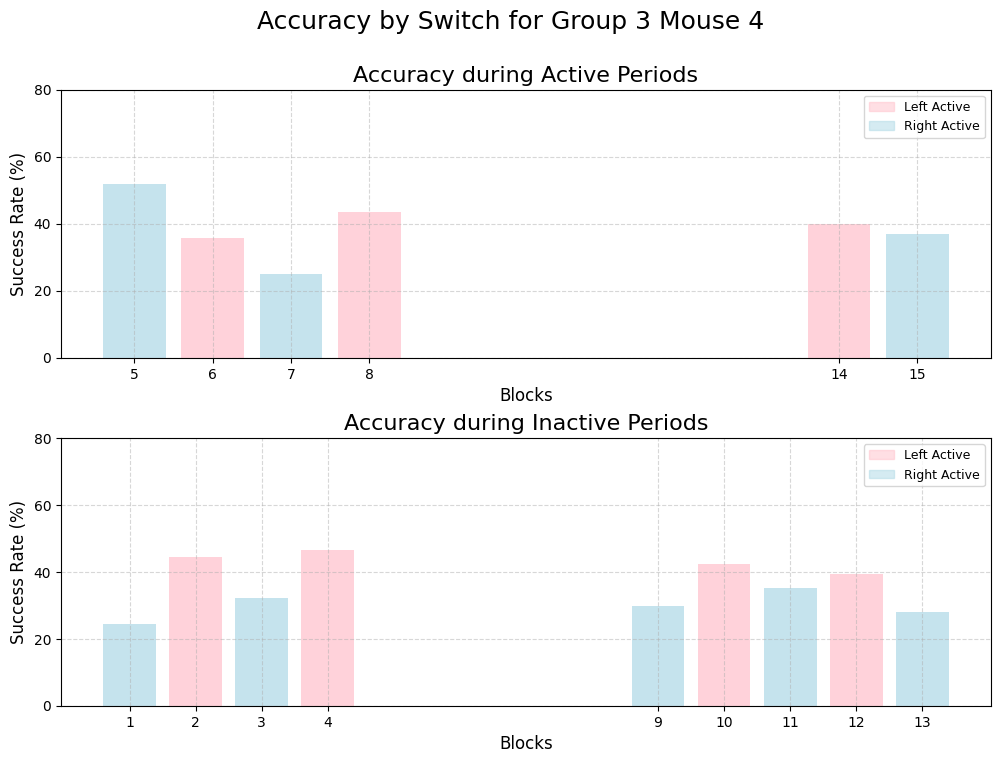

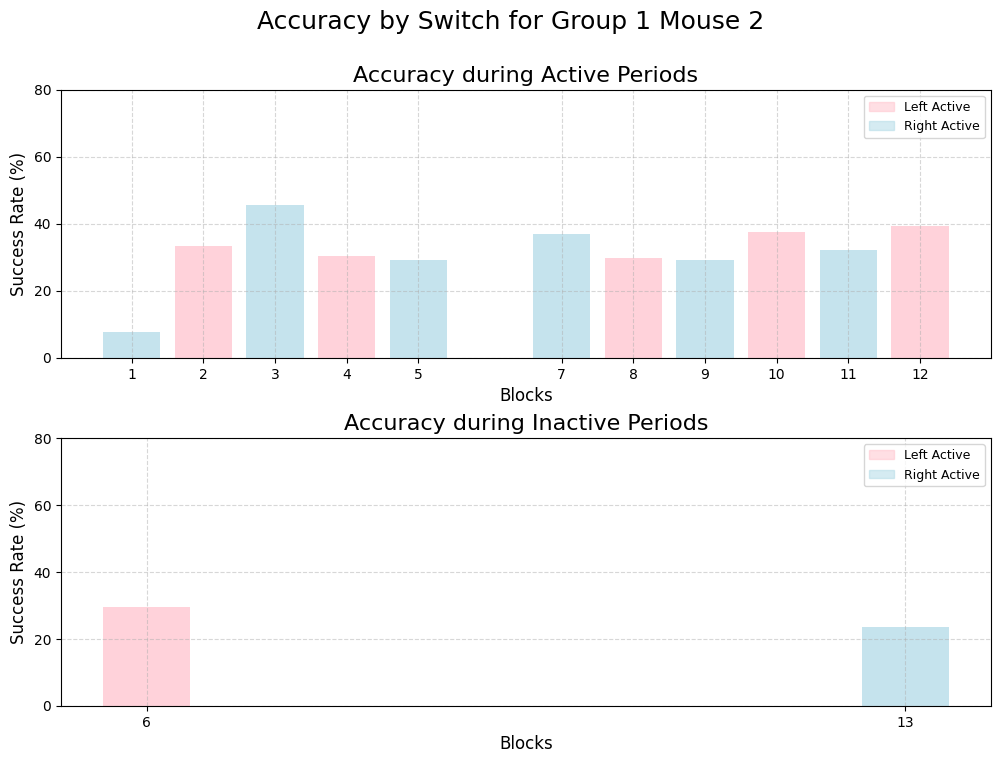

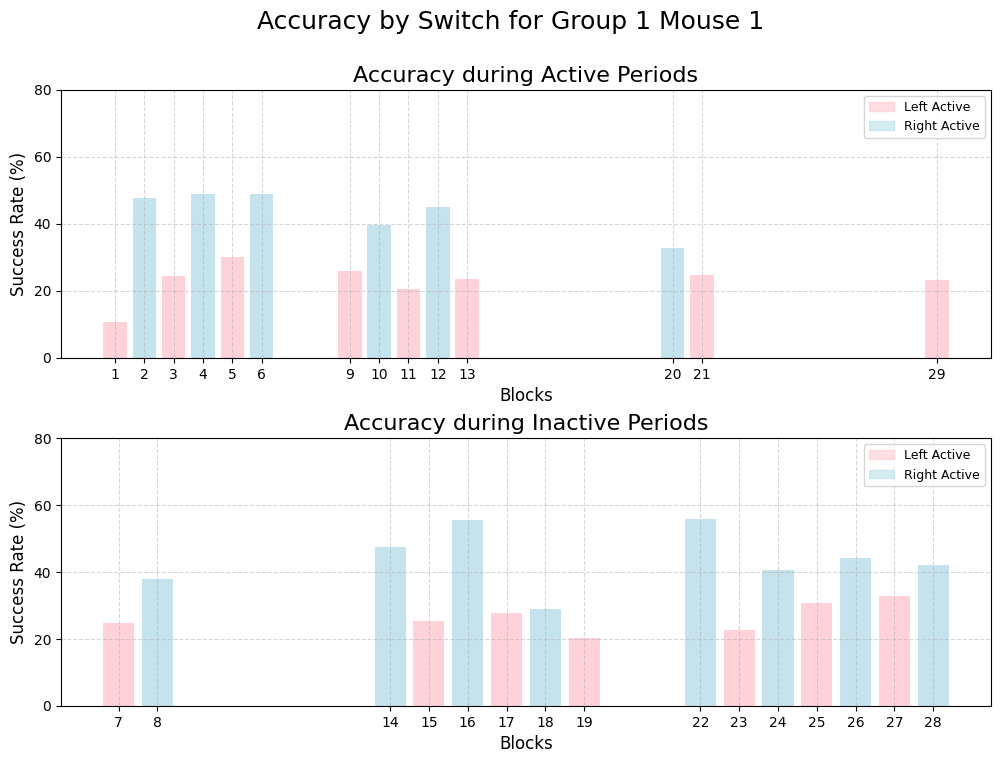

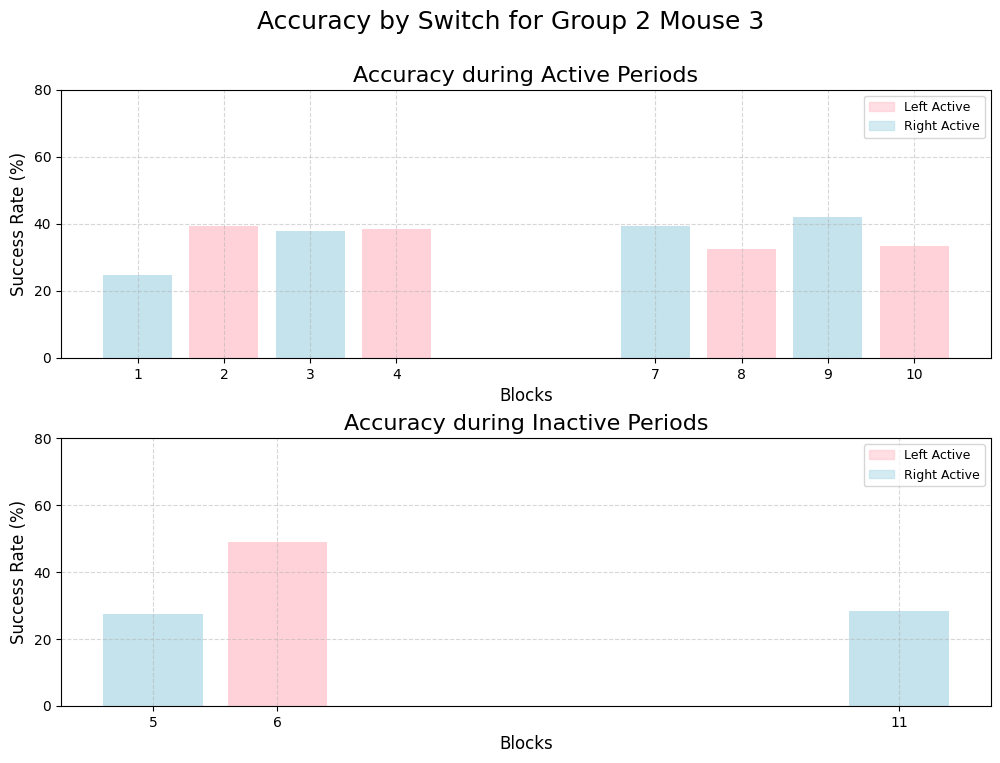

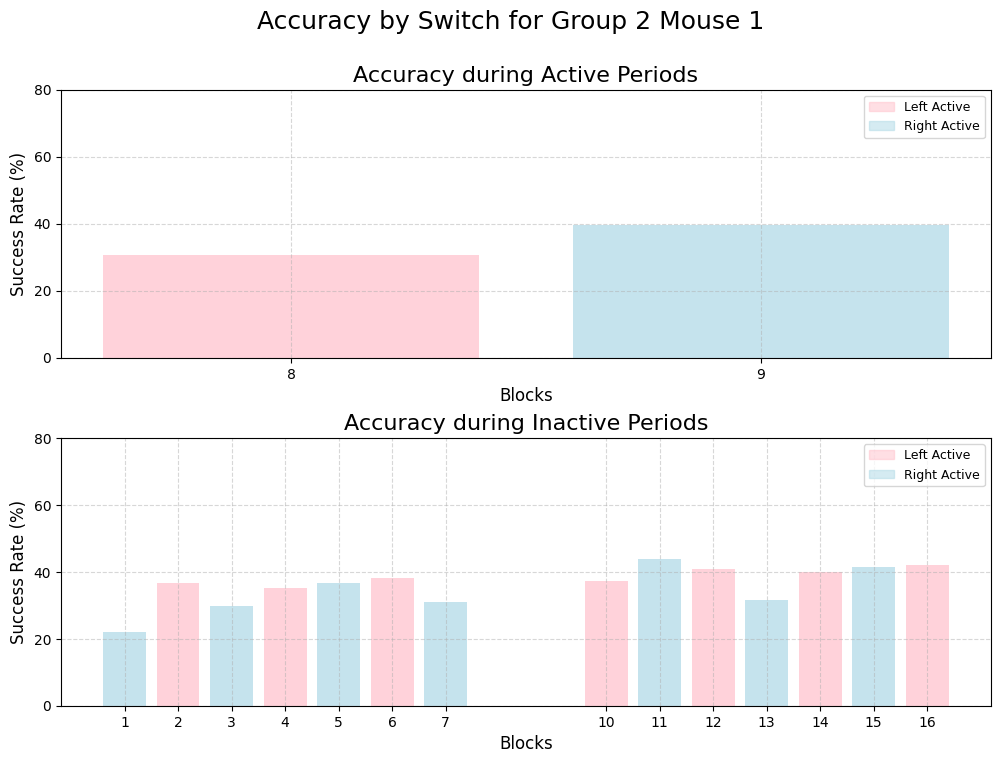

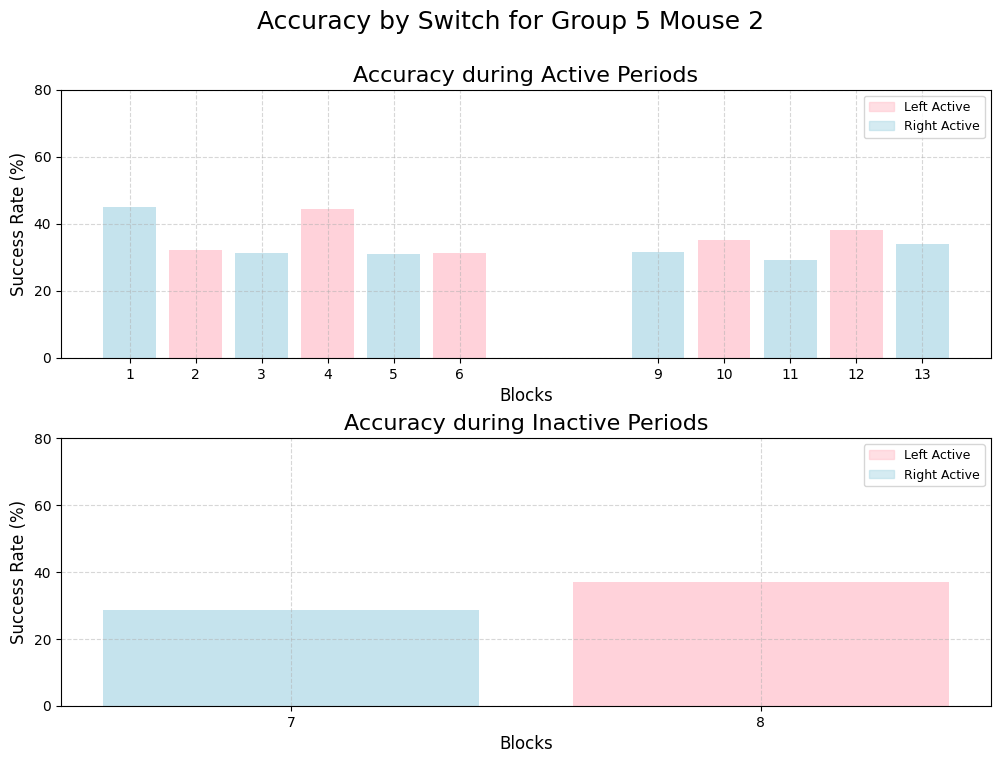

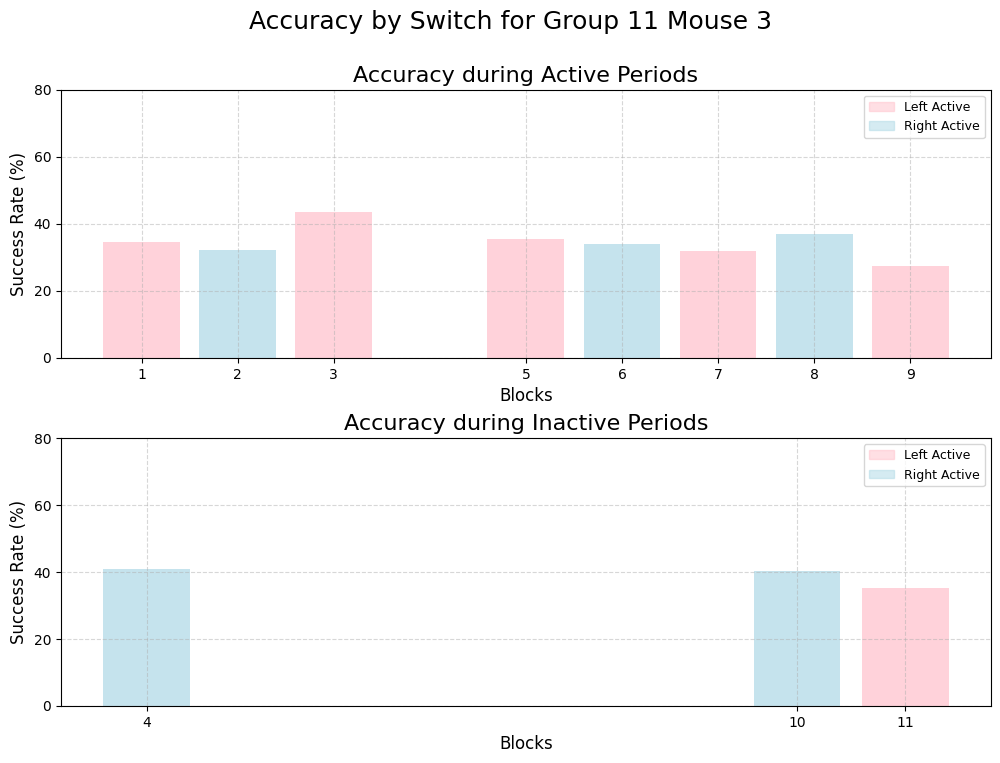

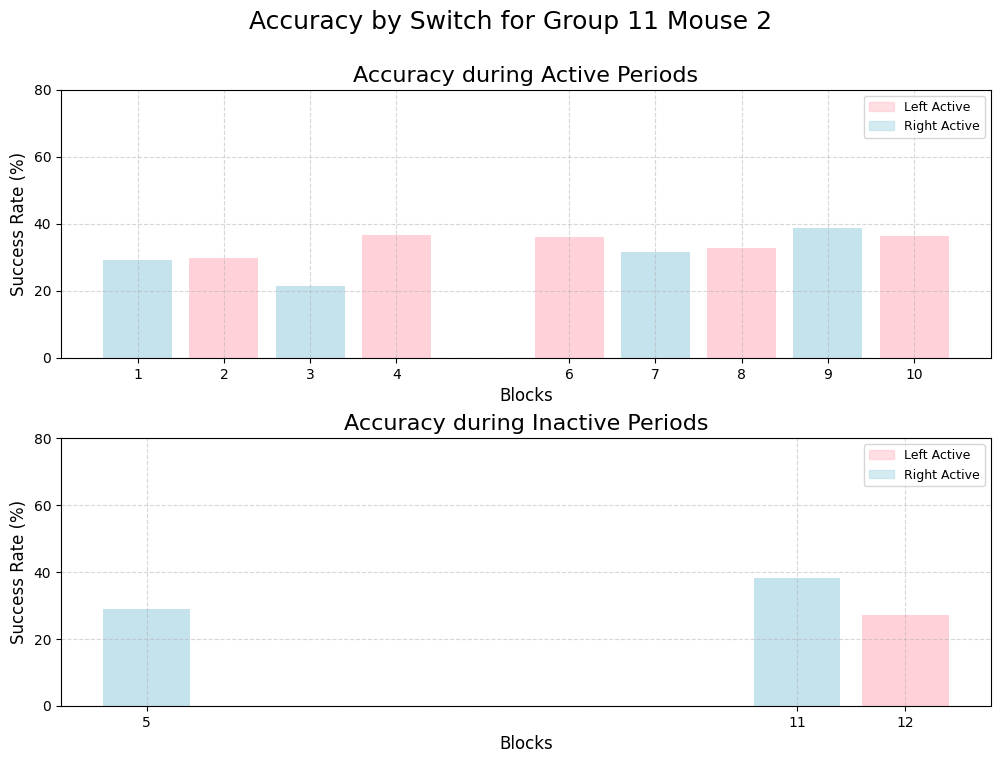

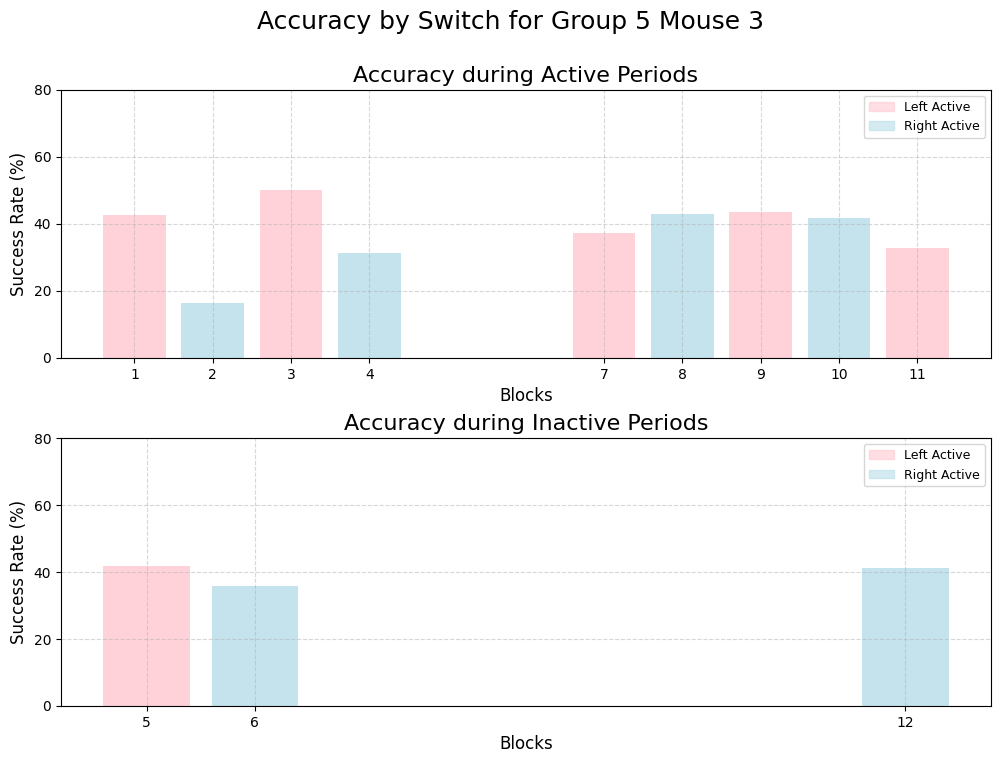

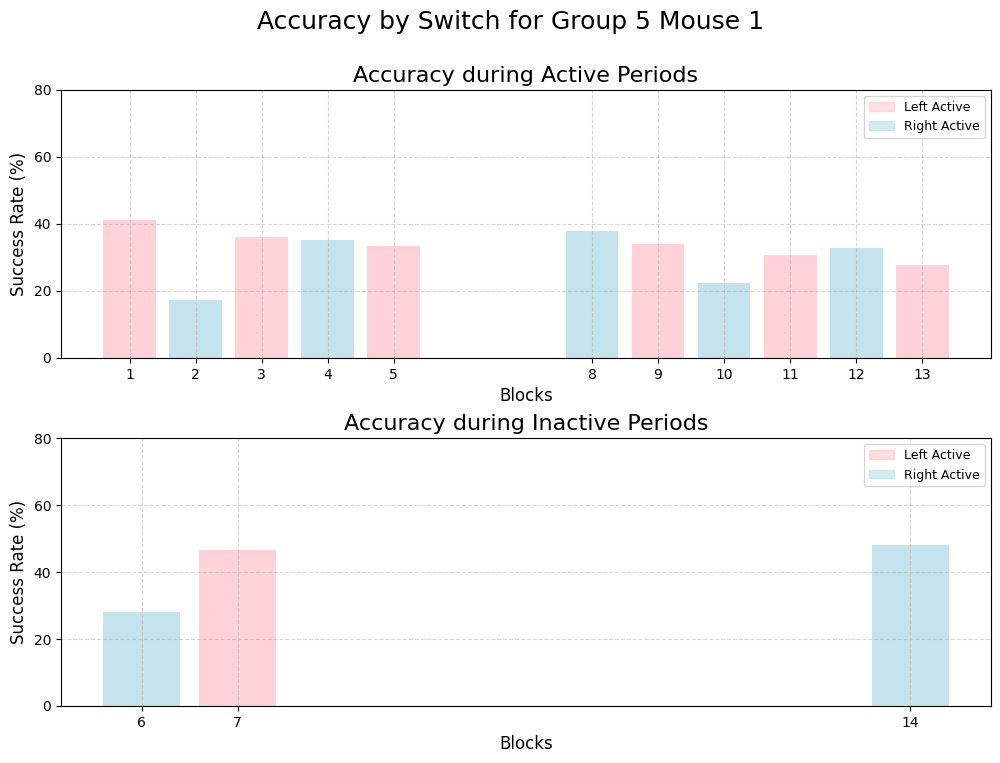

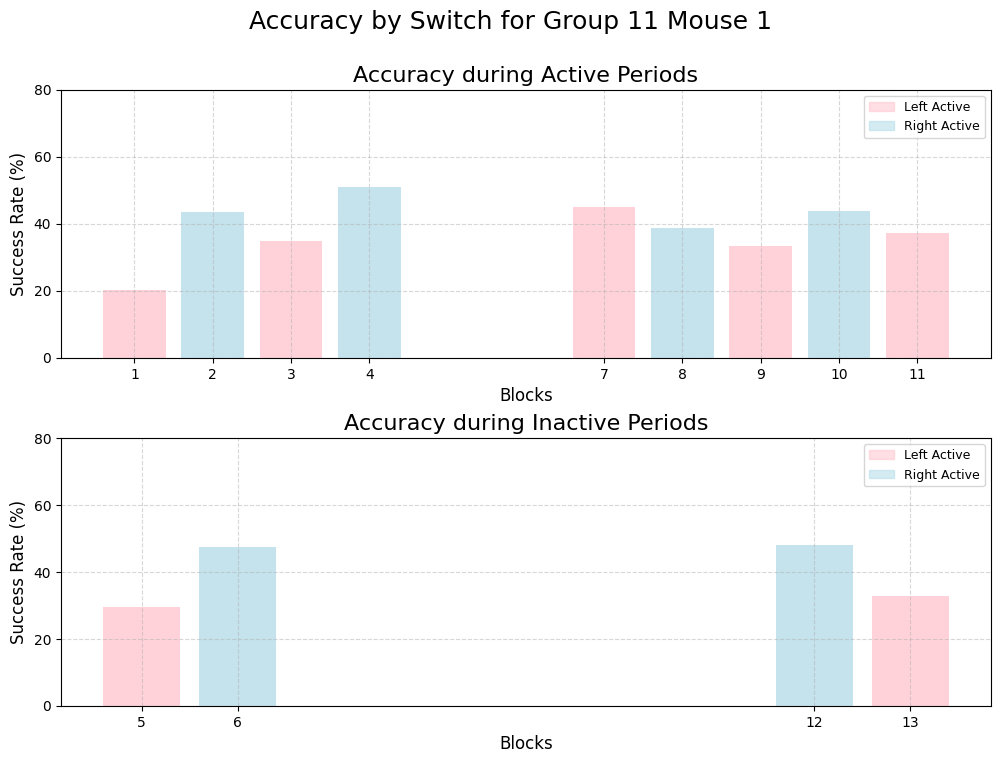

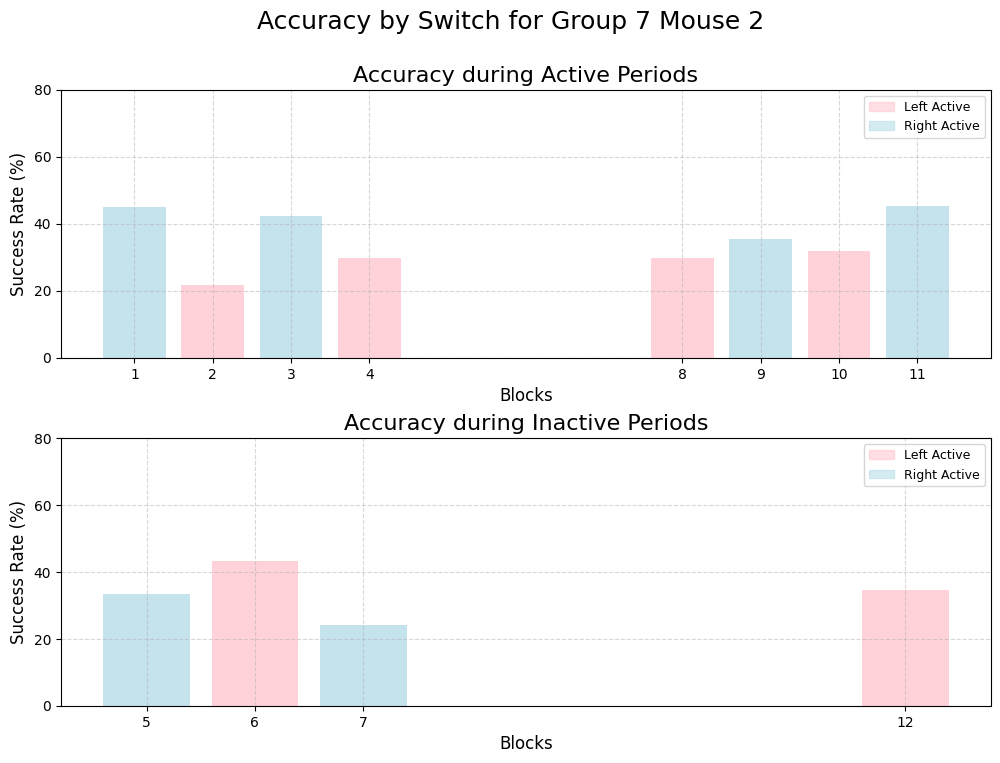

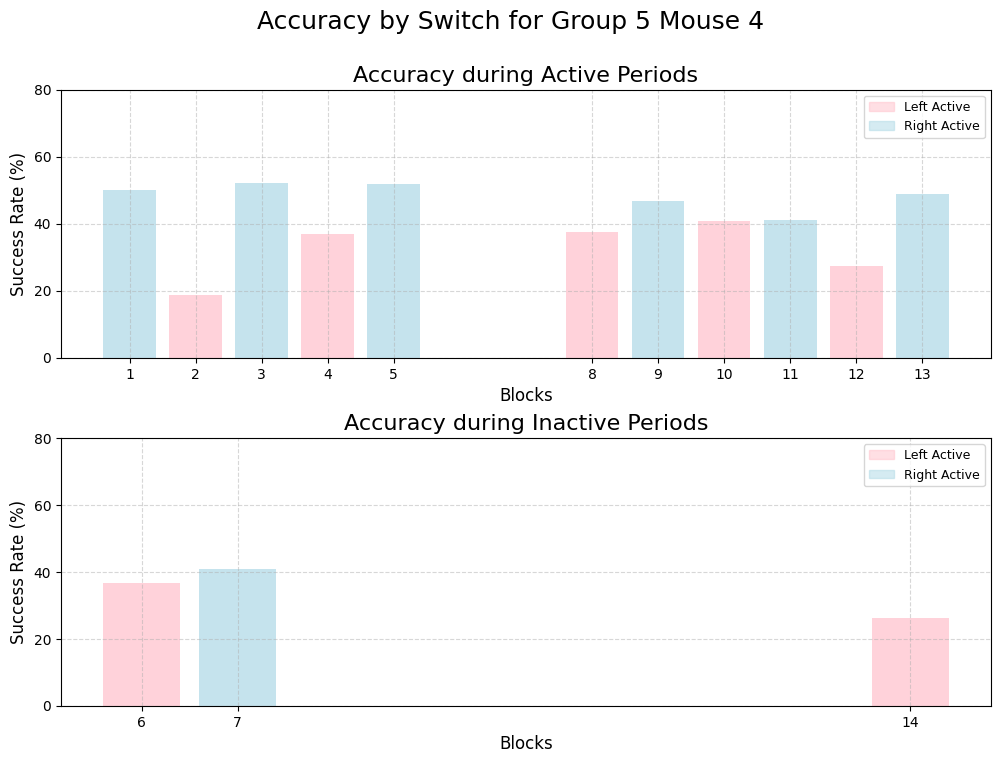

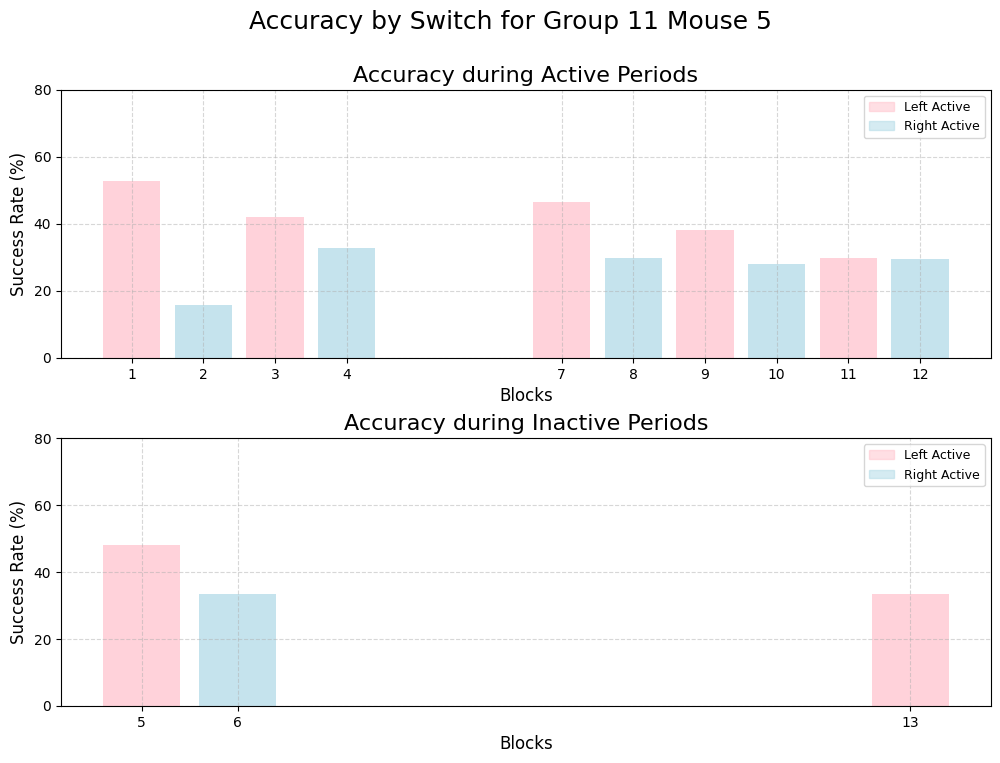

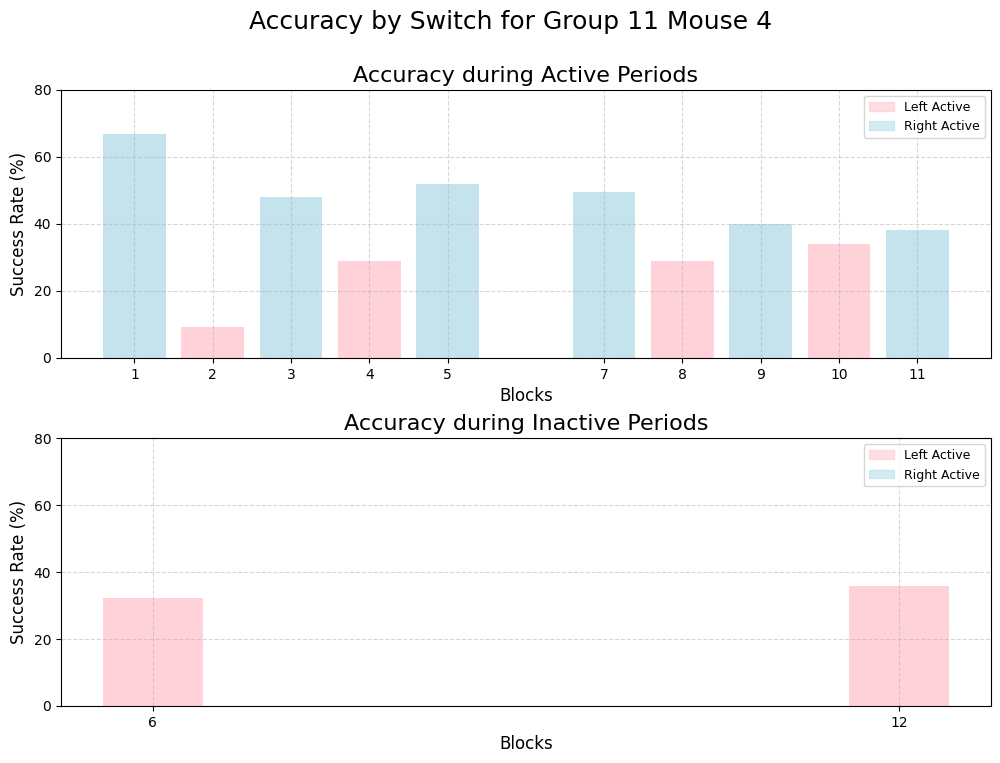

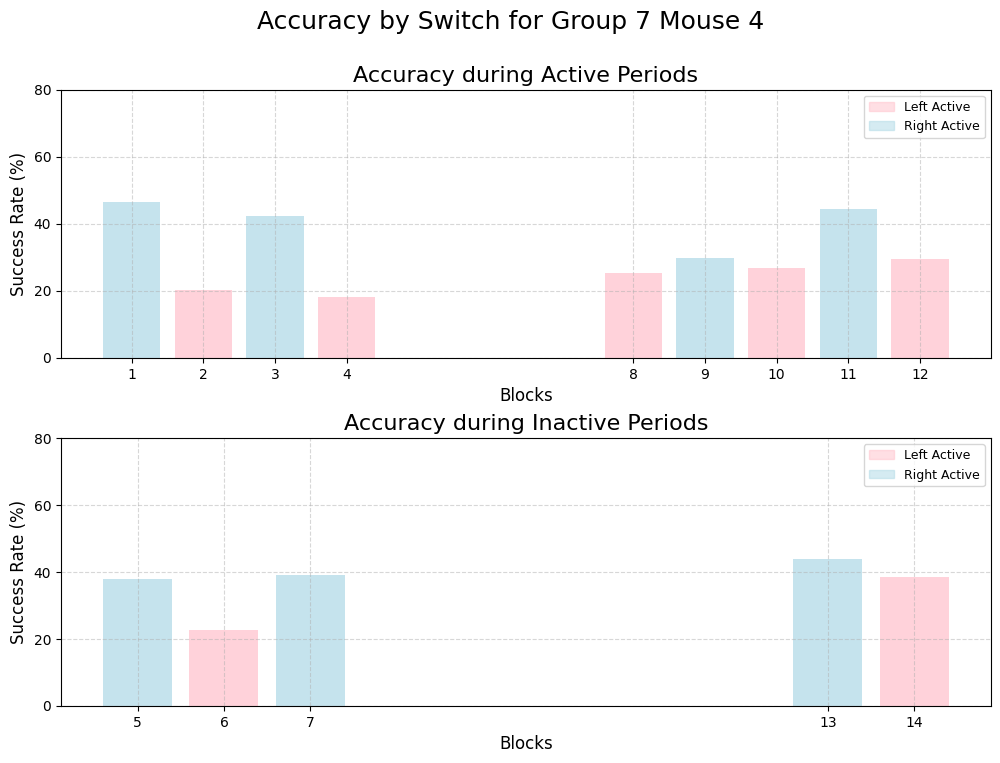

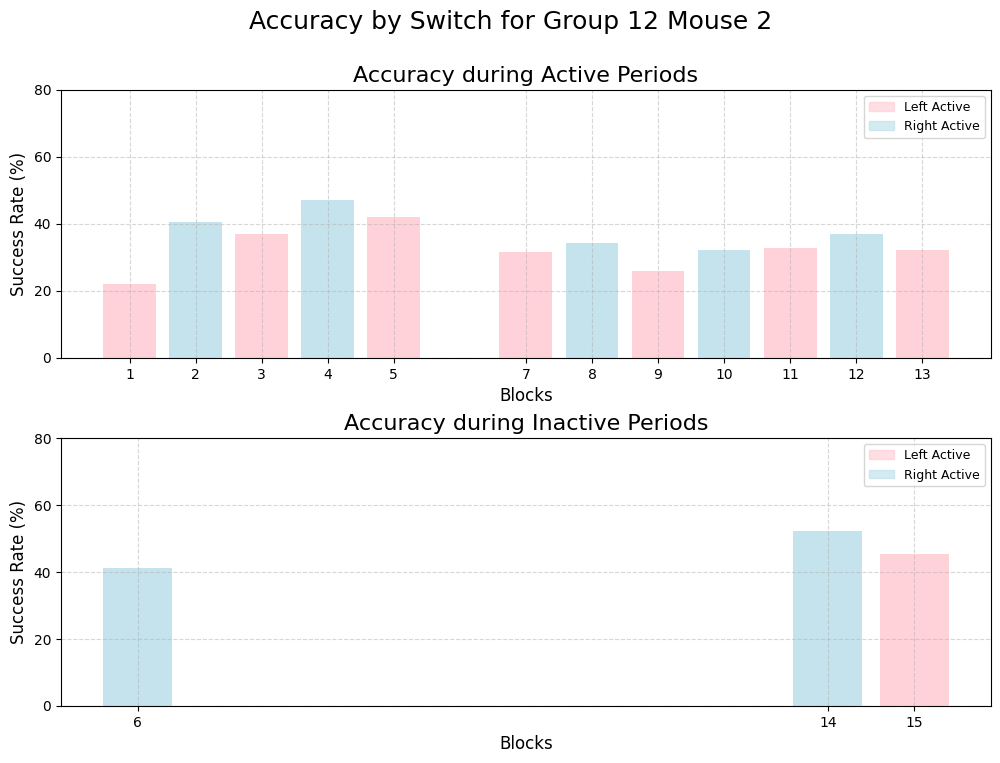

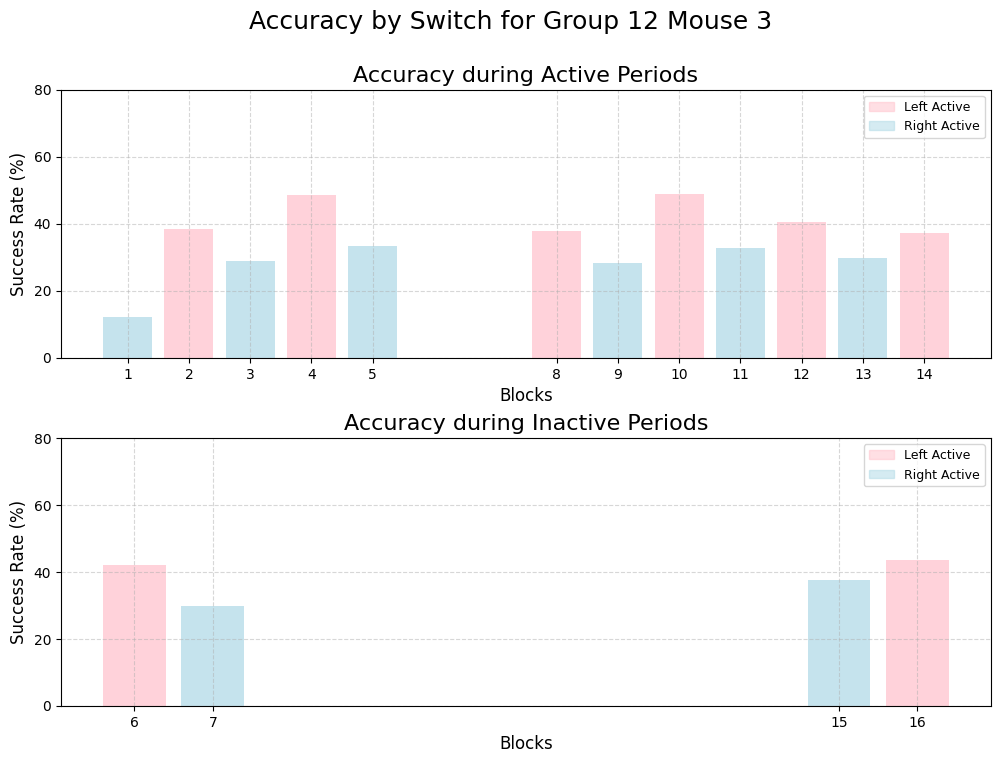

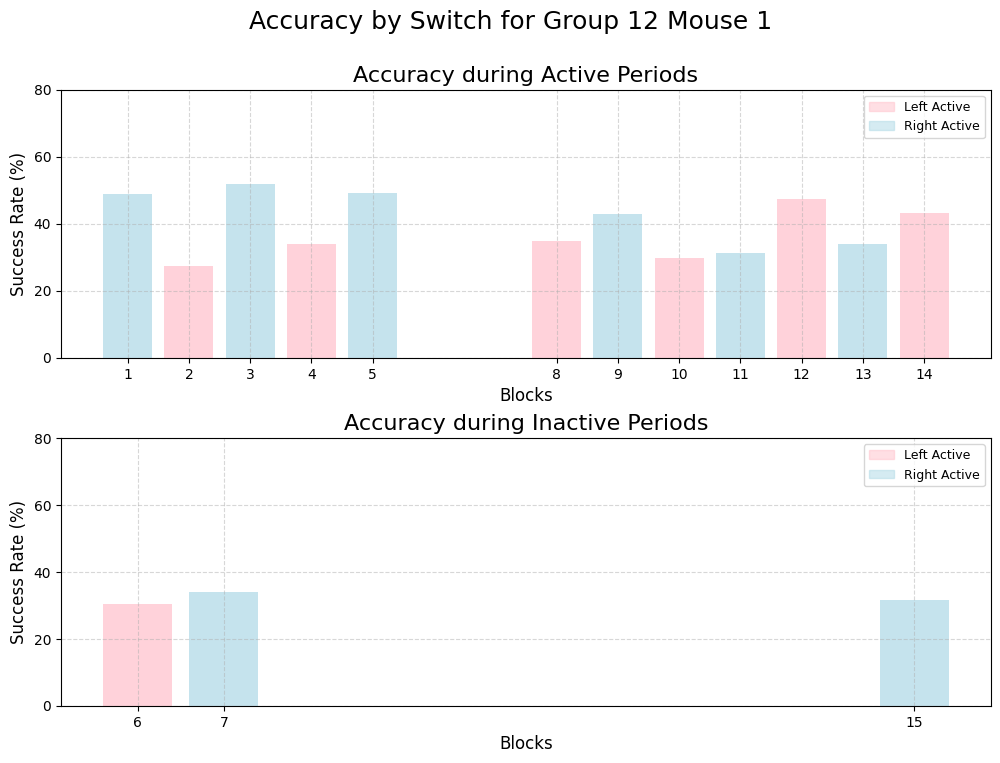

In [2]:
ctrl_learning_result = []
ctrl_scores = []

for sheet in ctrl_sheets[:]:
    data = read_excel_by_sheet(sheet, ctrl_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    dit.graph_learning_trend_by_activity(data_stats, blocks, path=sheet, block_prop=block_prop, action_prop=action_prop)
    ctrl_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    ctrl_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

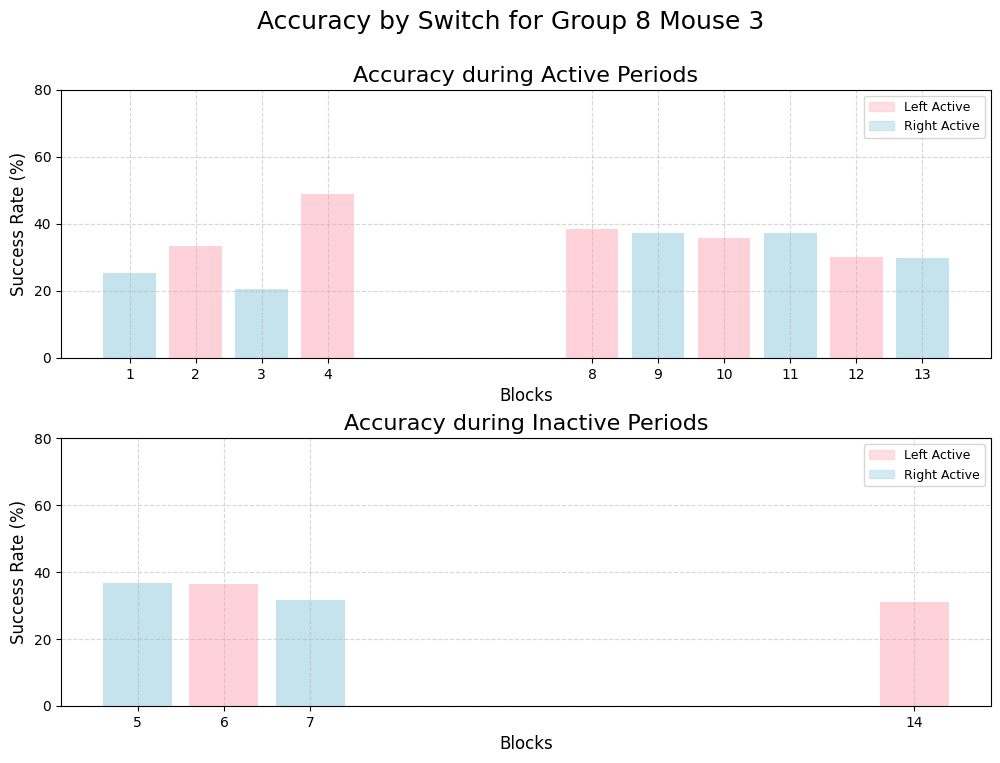

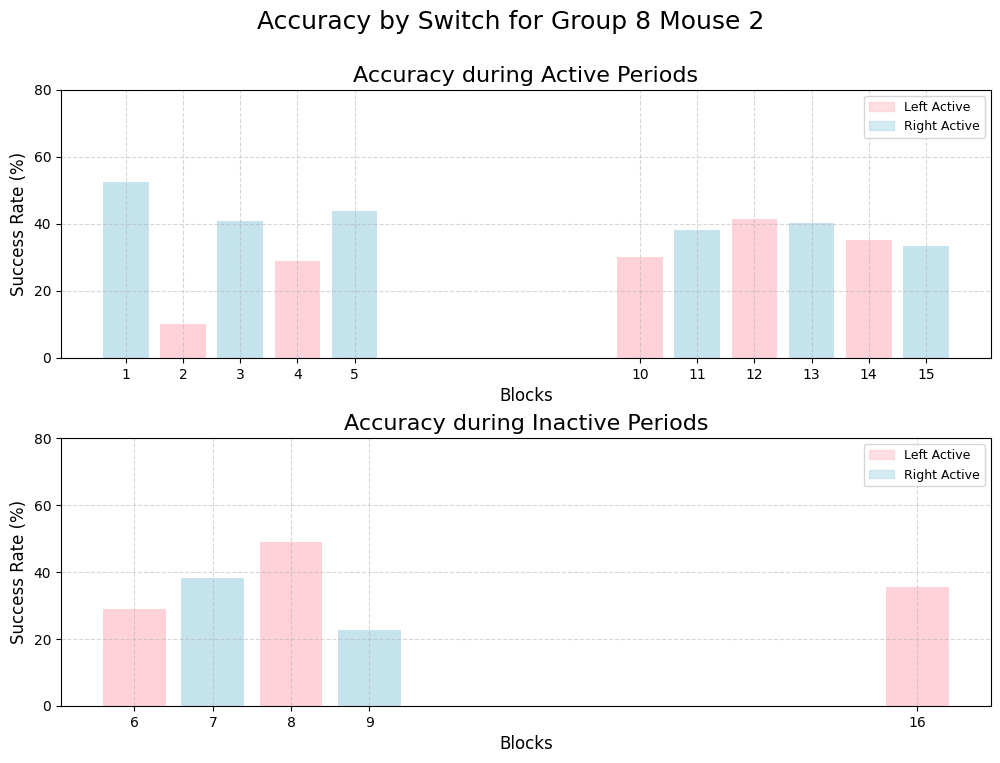

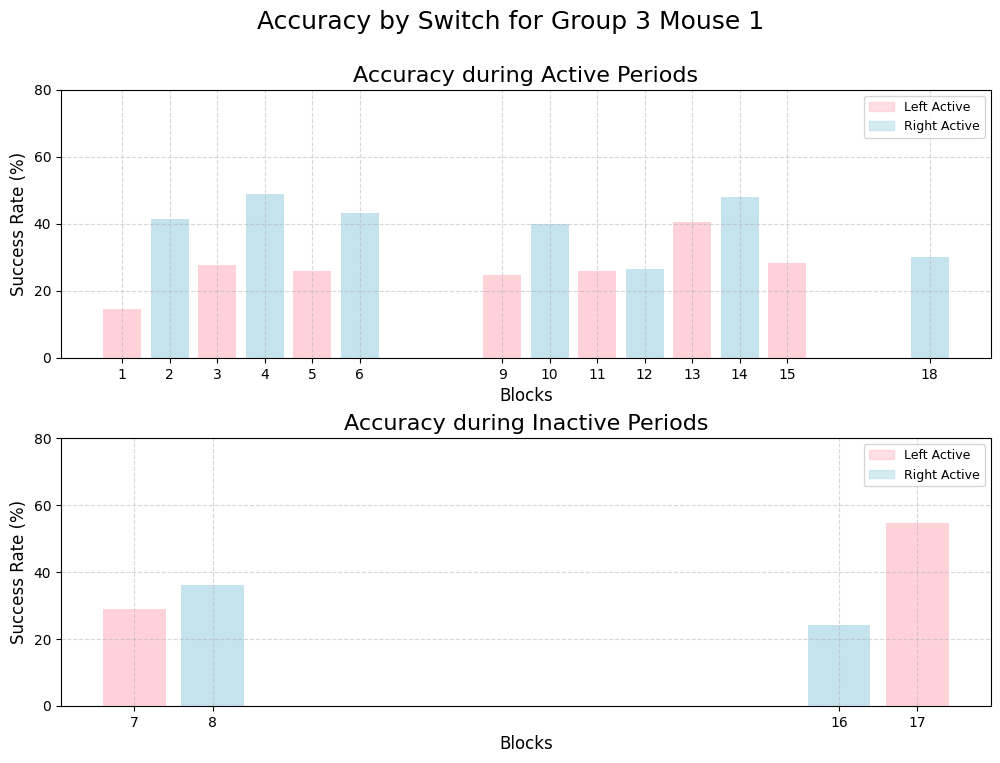

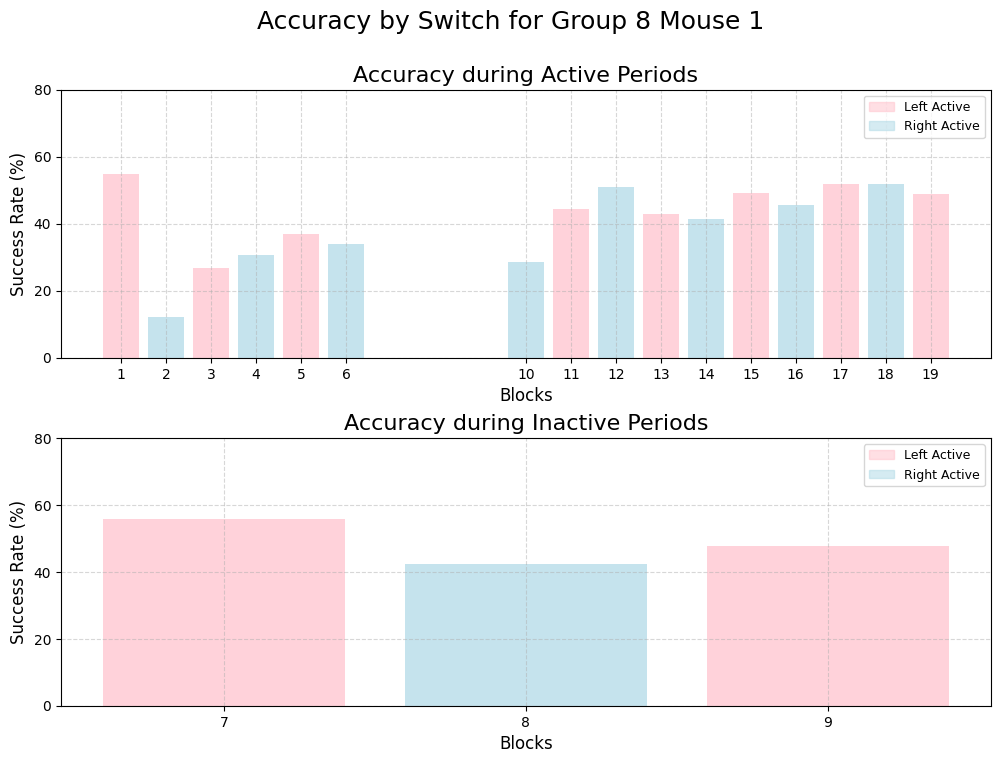

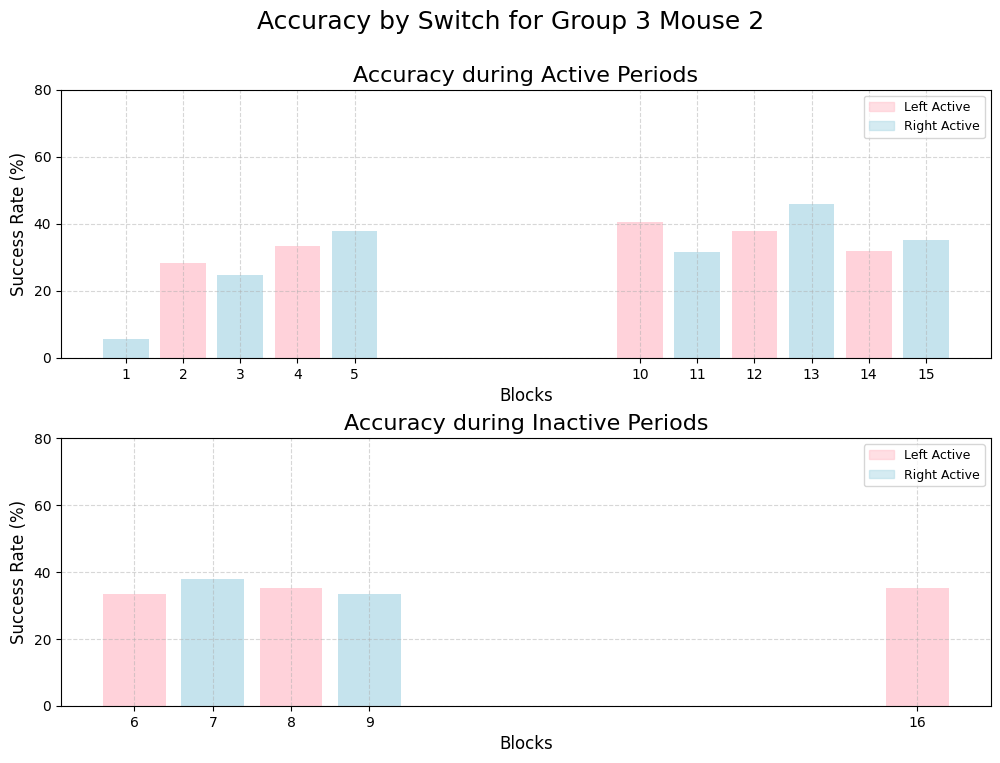

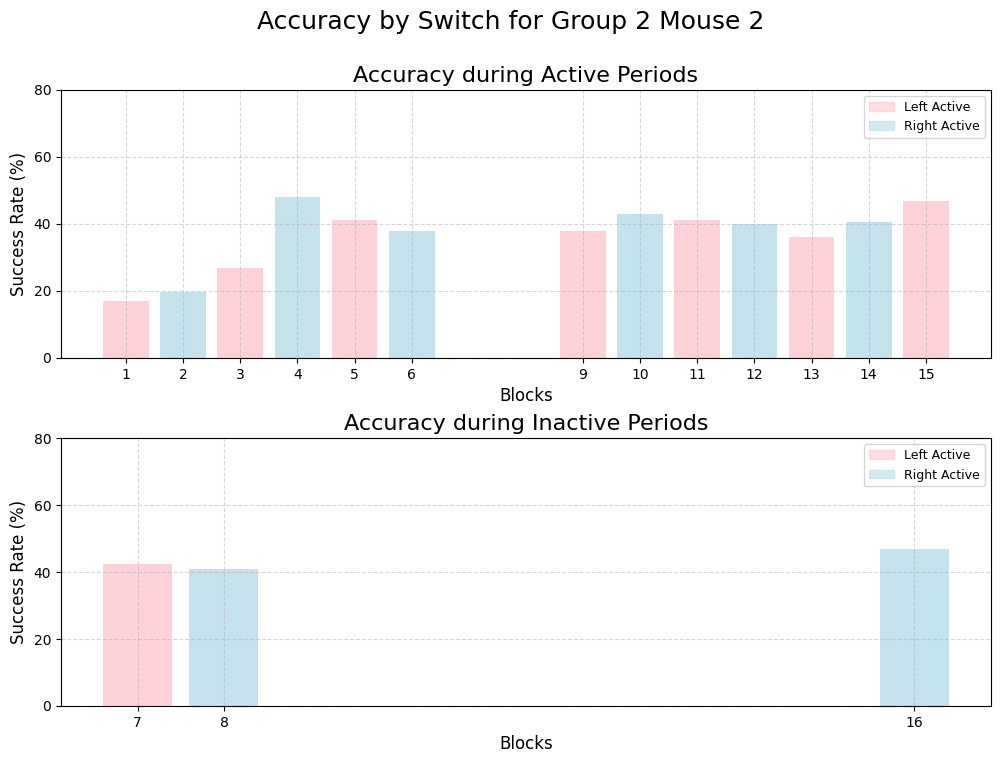

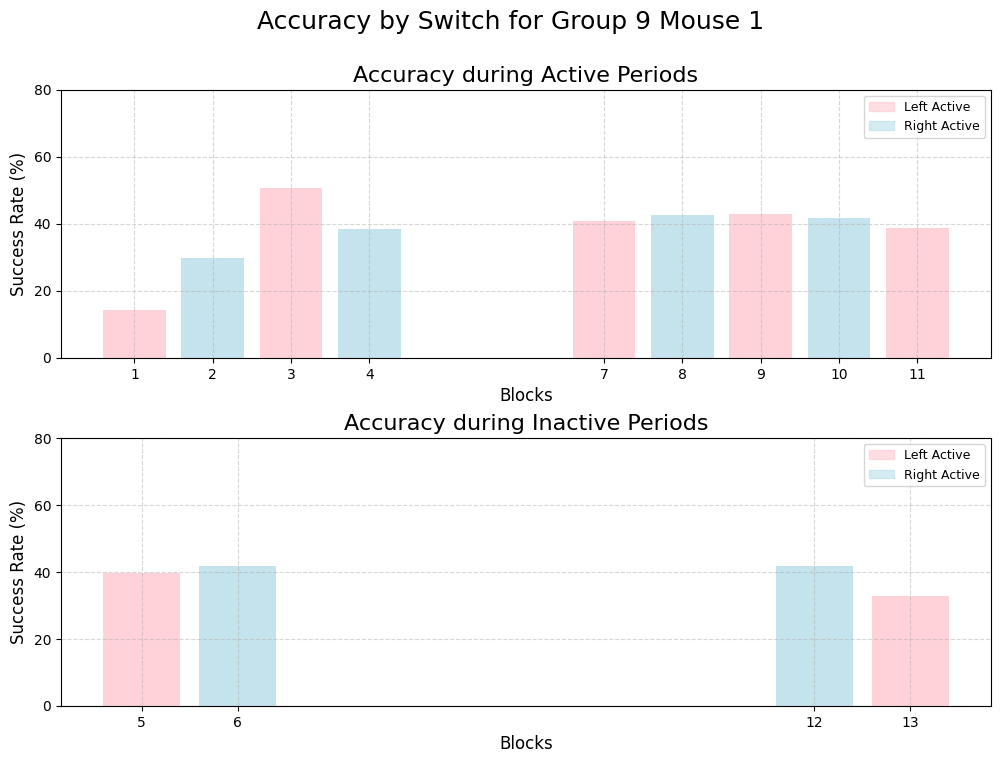

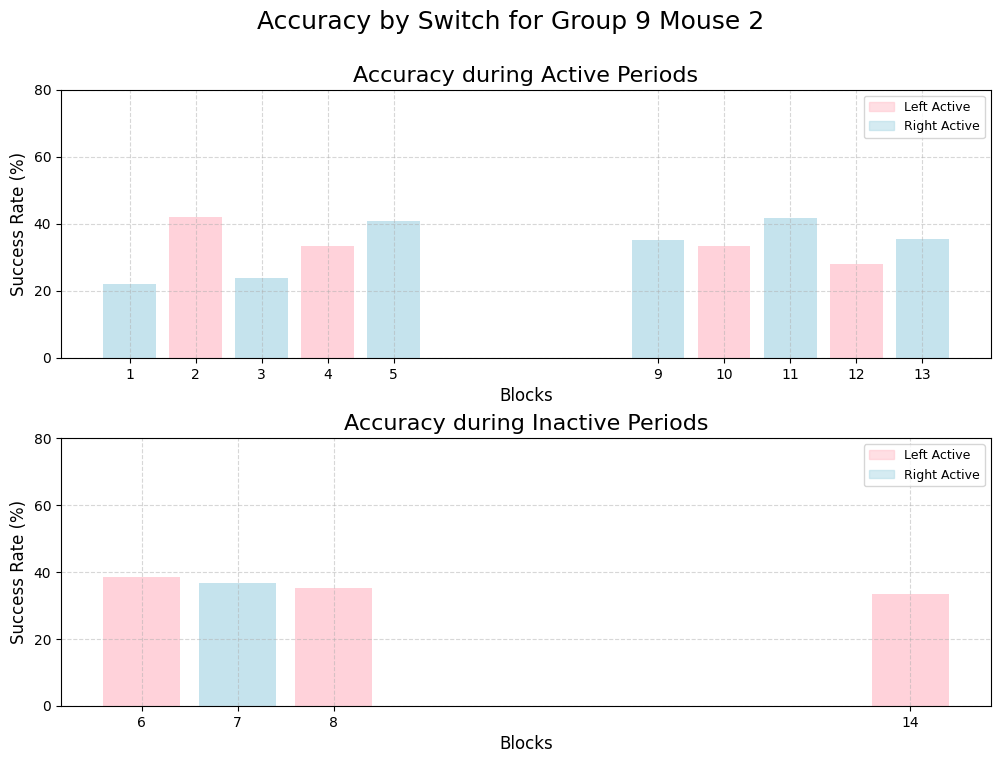

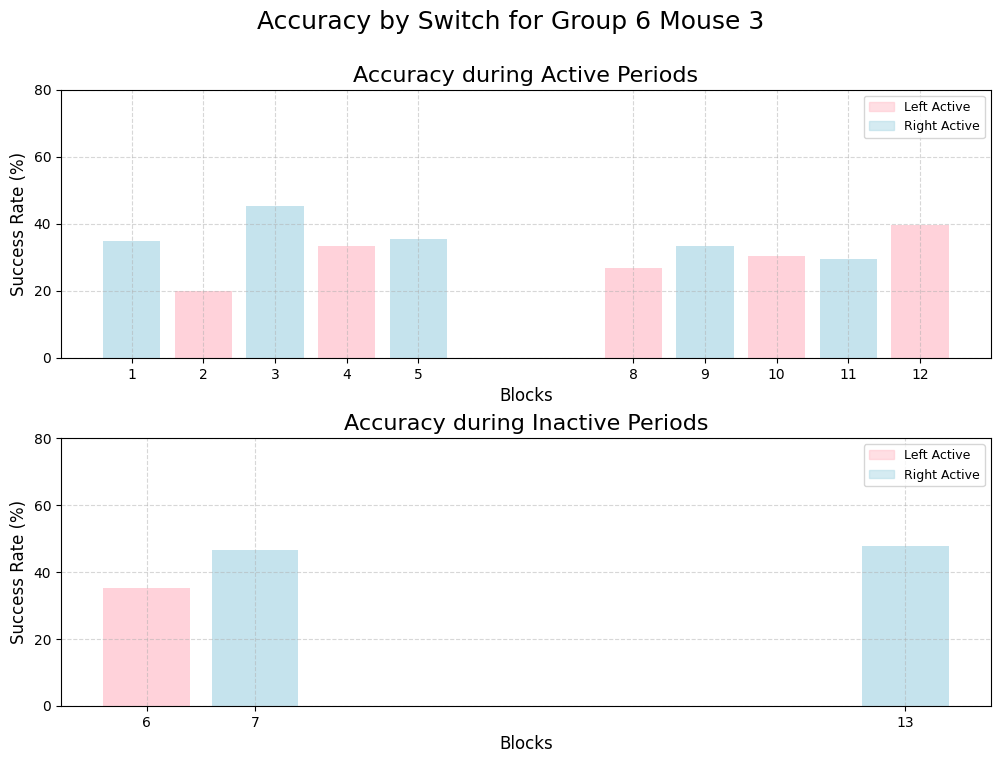

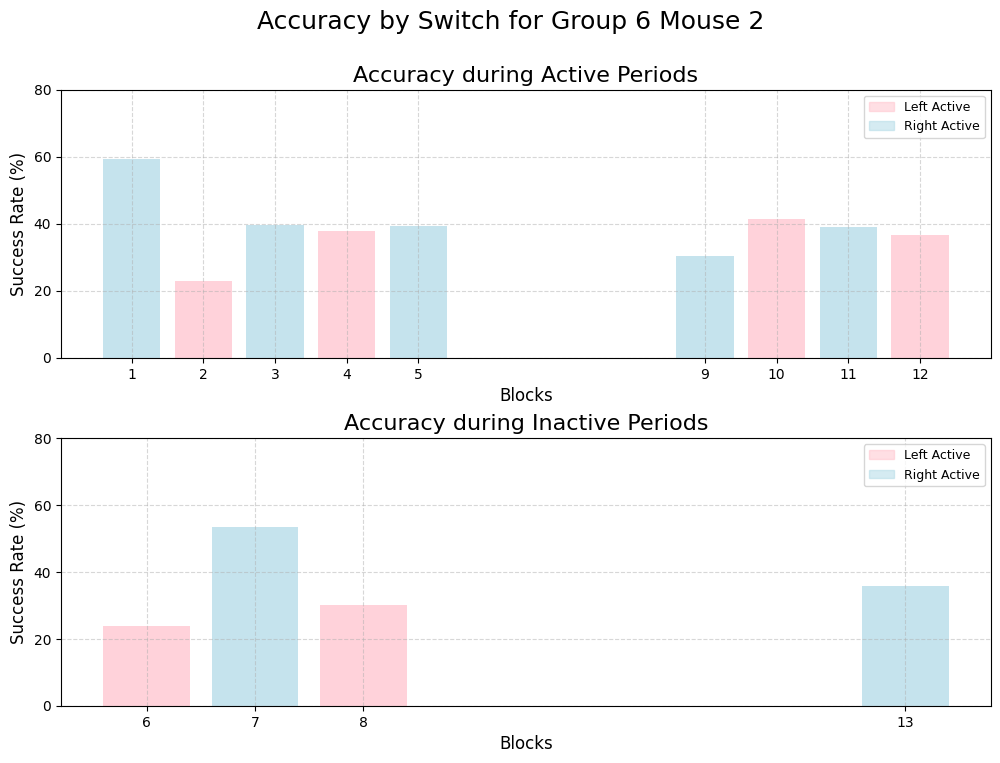

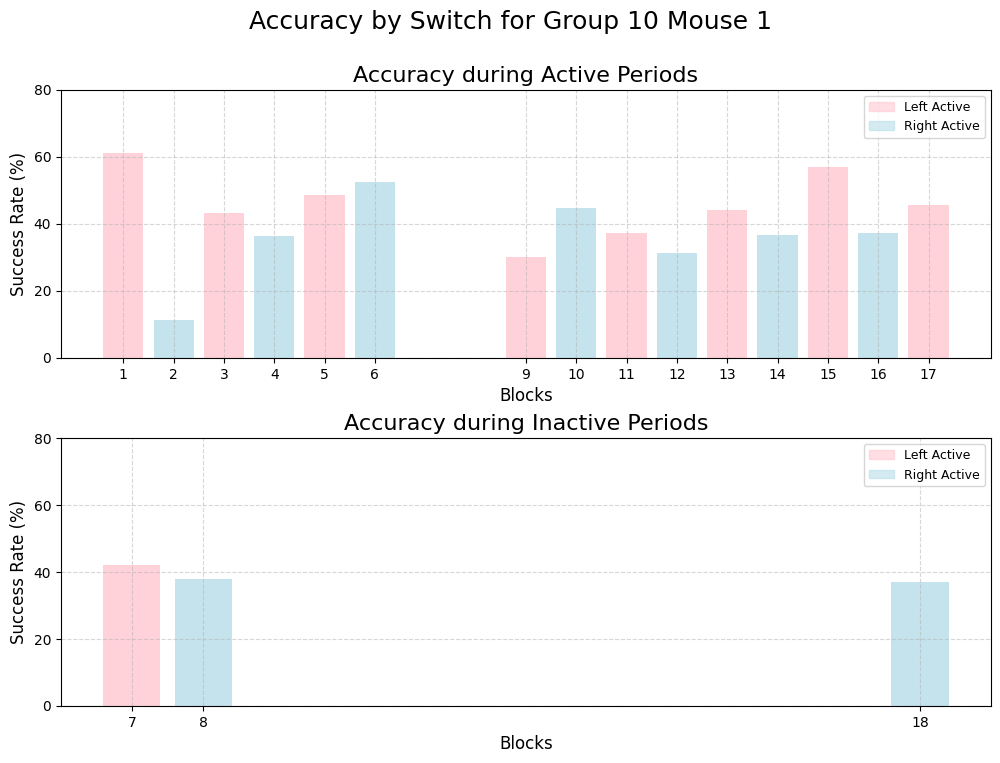

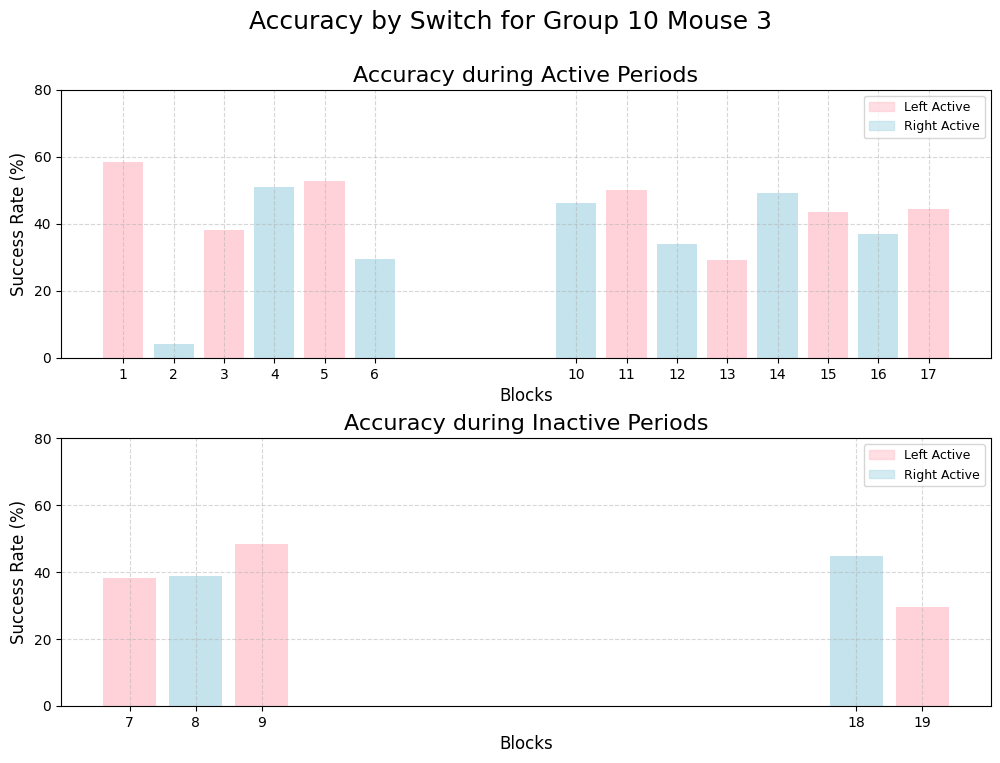

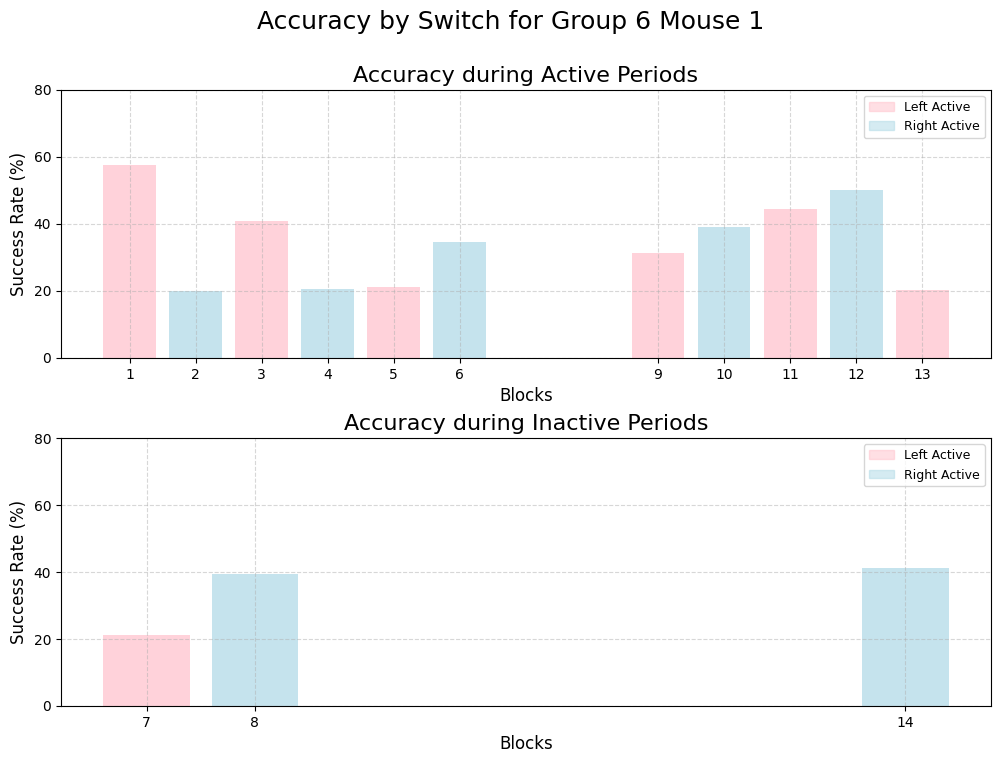

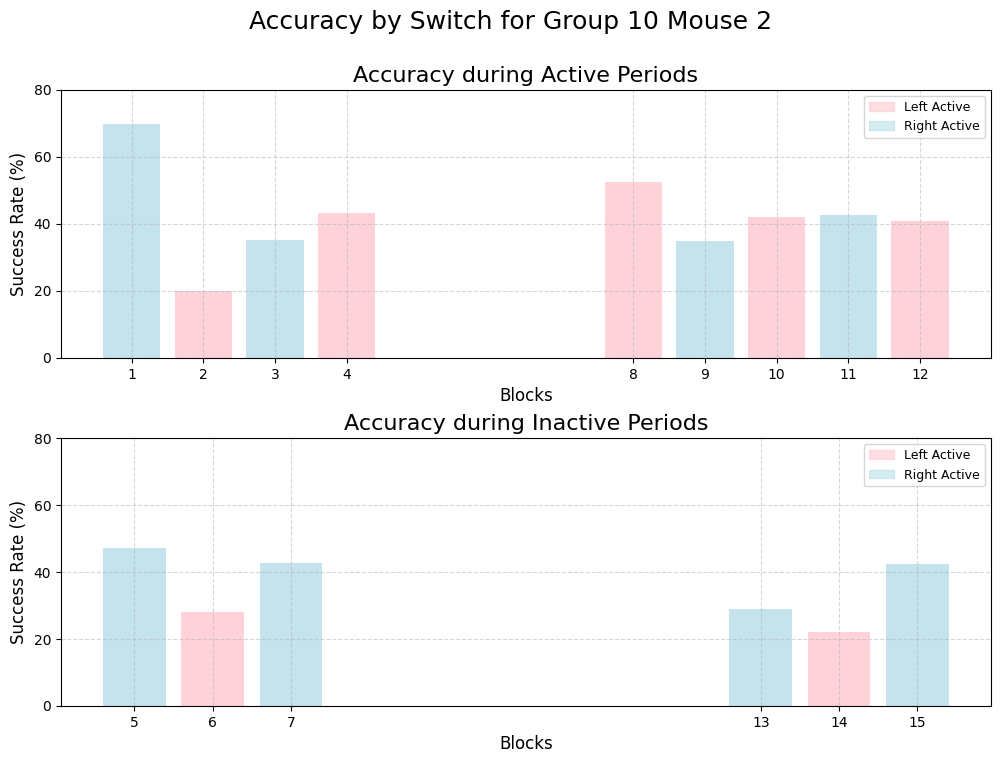

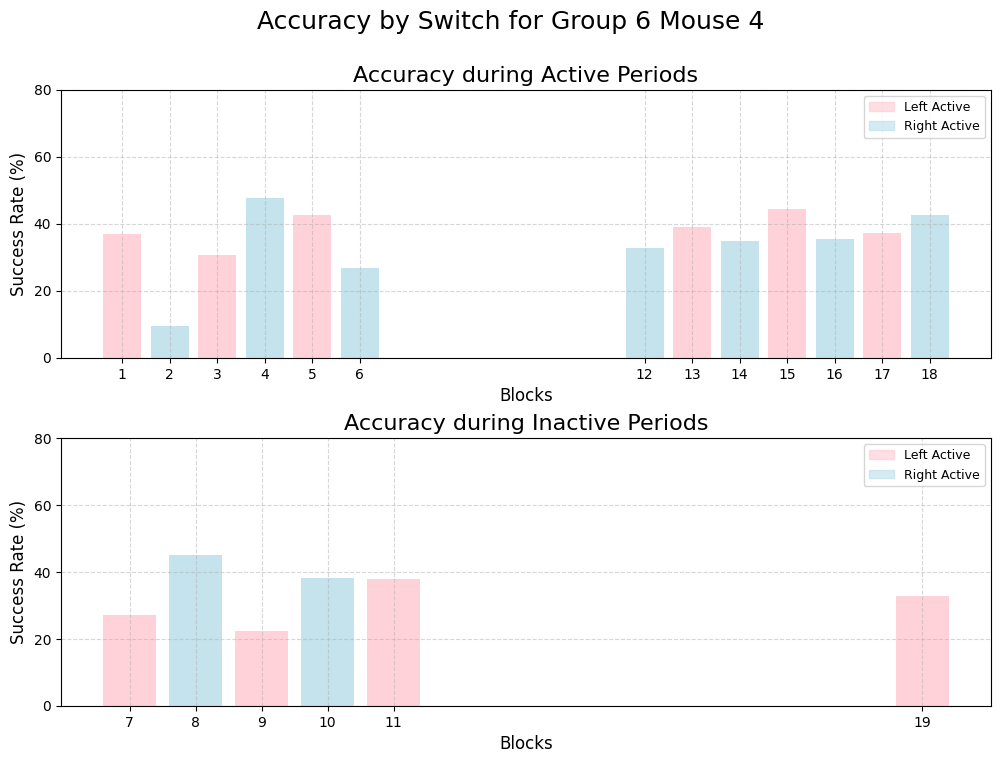

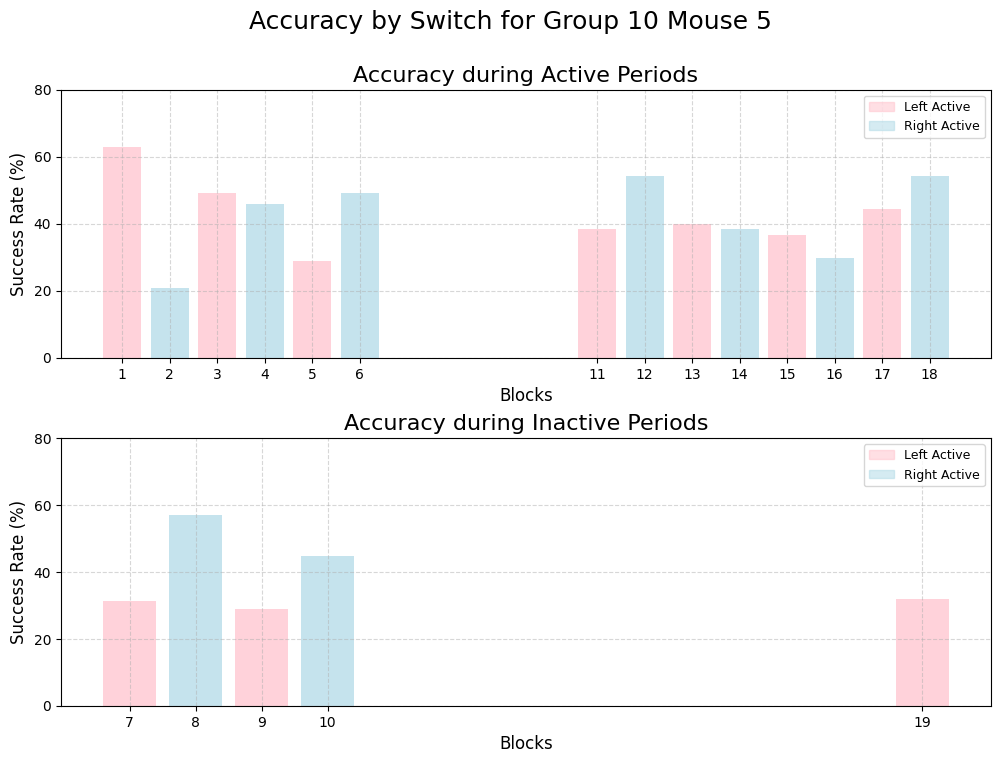

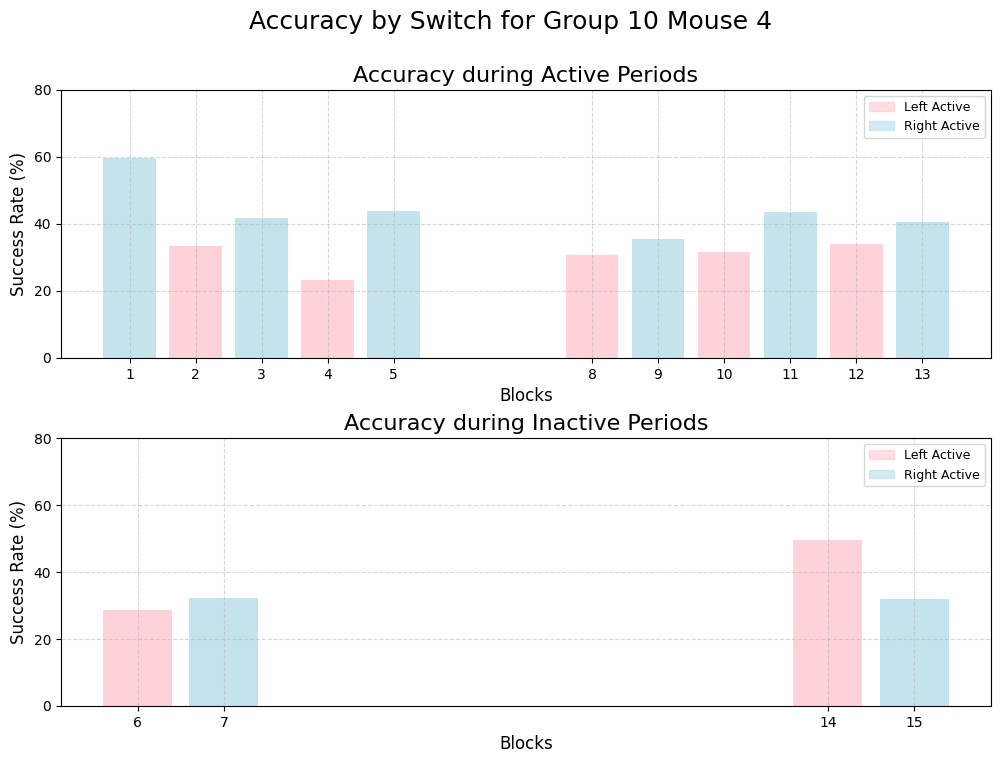

In [3]:
cask_scores = []
cask_learning_result = []

for sheet in cask_sheets:
    data = read_excel_by_sheet(sheet, cask_path, cumulative_accuracy=False)  
    blocks = dit.split_data_to_blocks(data, day=day)
    data_stats = dit.get_transition_info(blocks, meal_config=meal_config, reverse=False)
    dit.graph_learning_trend_by_activity(data_stats, blocks, path=sheet, block_prop=block_prop, action_prop=action_prop)
    cask_learning_result.append(dit.learning_result(blocks, action_prop=action_prop))
    cask_scores.append(dit.learning_score(blocks, block_prop=1, action_prop=action_prop))

In [4]:
perform_T_test(ctrl_scores, cask_scores, test_side='greater')

P Value is  0.03533144910229612
Experiment group is significantly greater than control group


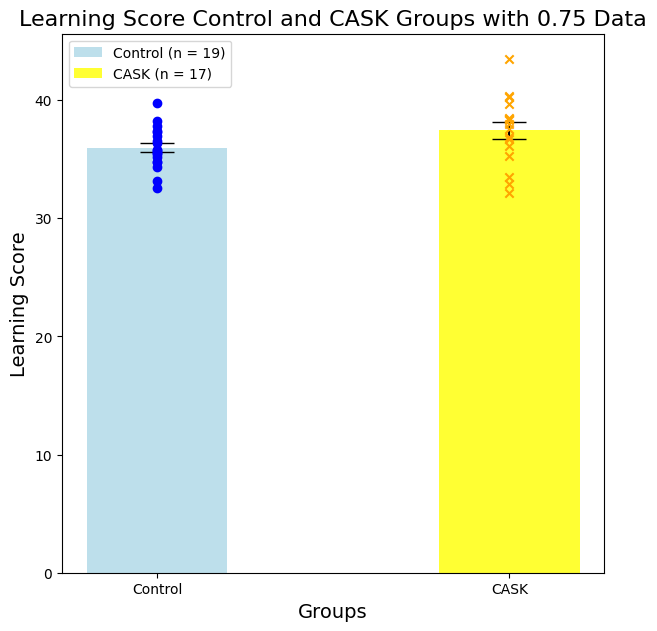

In [5]:
dit.graph_learning_score(ctrl_scores, cask_scores, exp_group_name='CASK', proportion=action_prop)

In [6]:
perform_T_test(ctrl_learning_result, cask_learning_result, test_side='greater')

P Value is  9.71769637232138e-06
Experiment group is significantly greater than control group


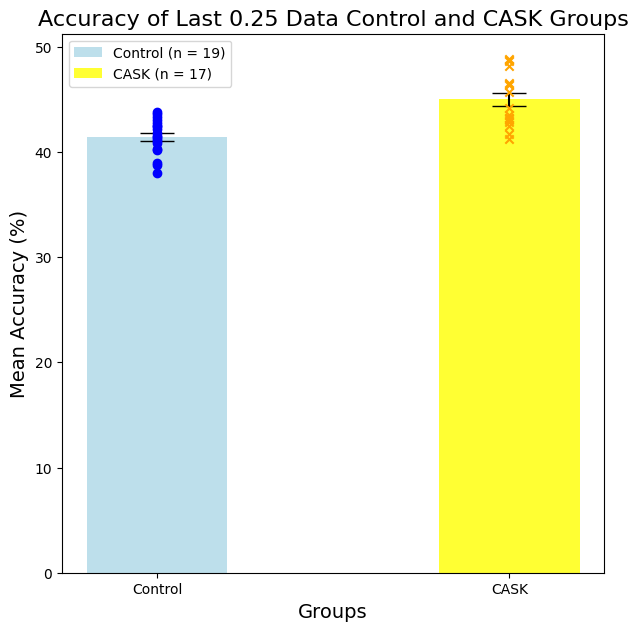

In [7]:
dit.graph_learning_results(ctrl_learning_result, cask_learning_result, proportion=0.25, exp_group_name='CASK')

### Pellet Collect Time

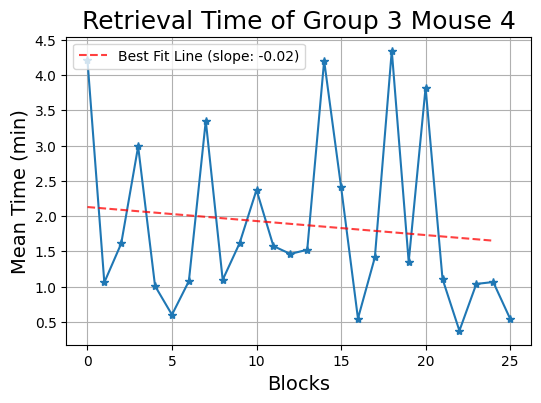

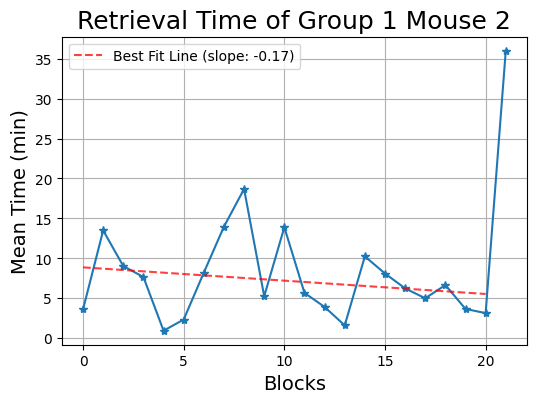

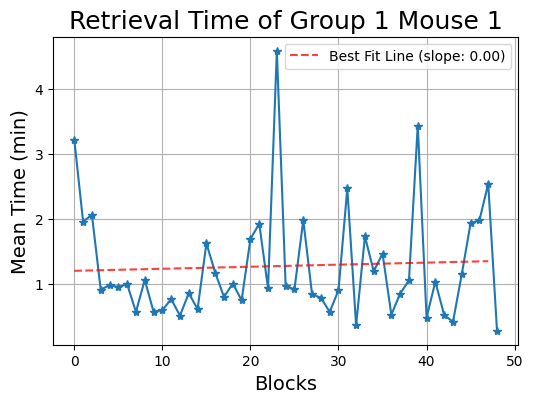

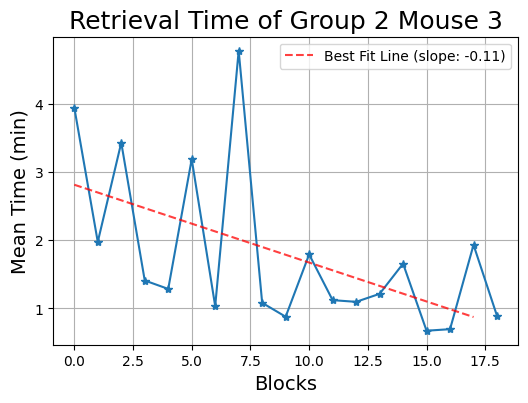

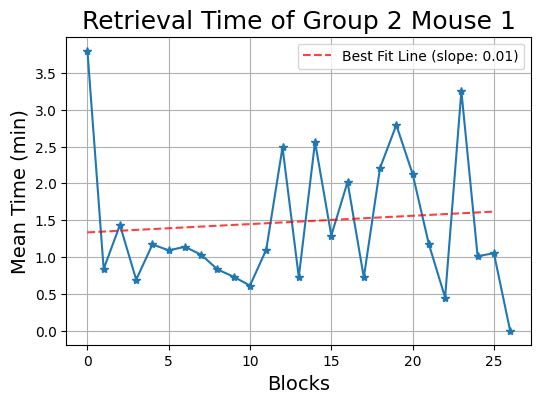

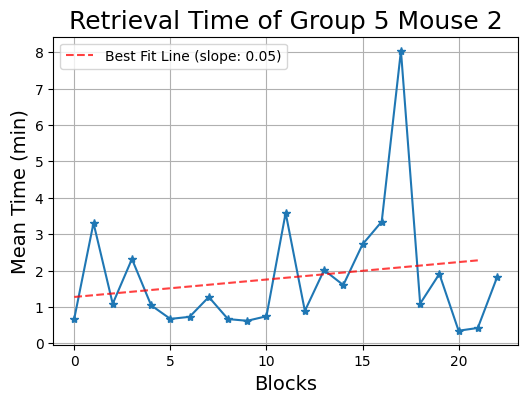

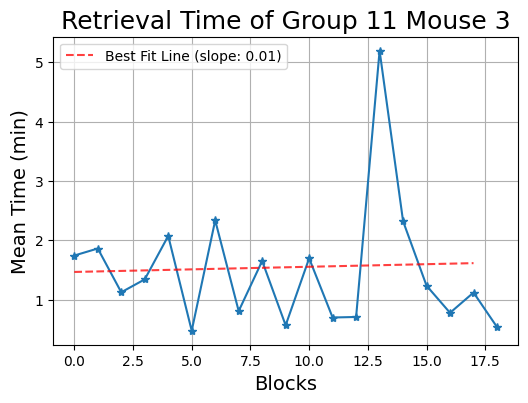

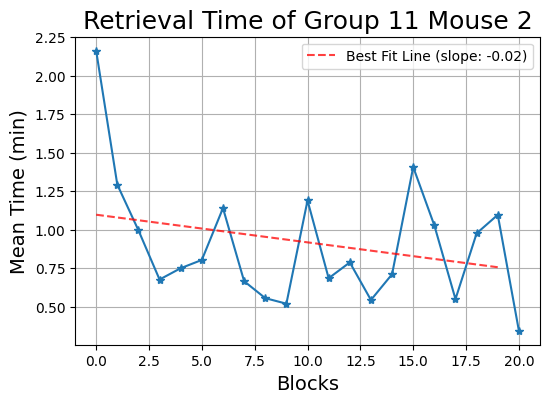

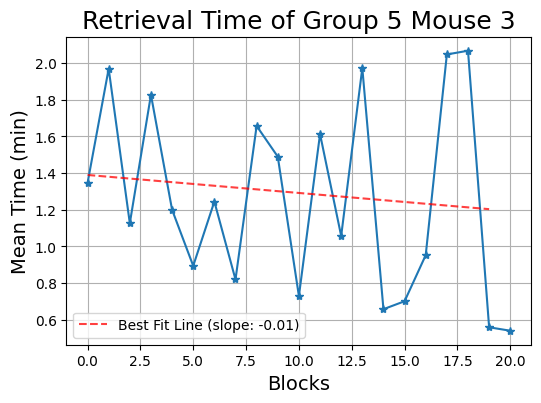

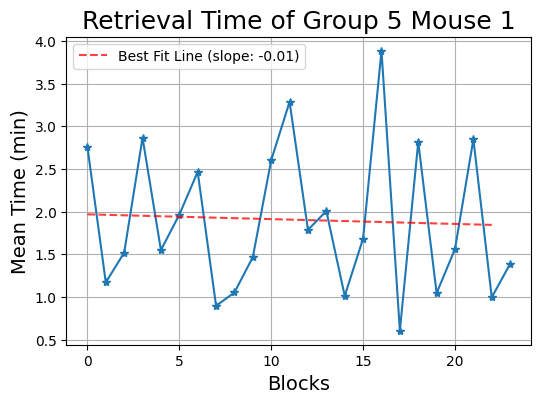

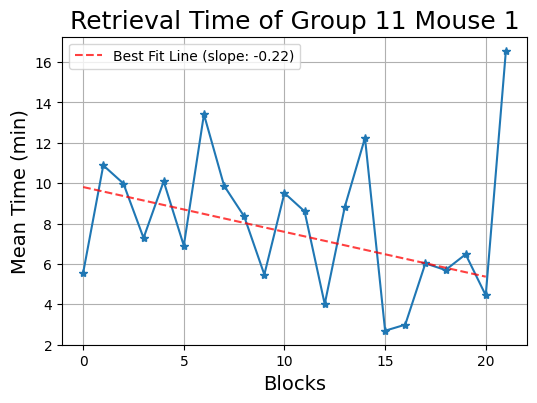

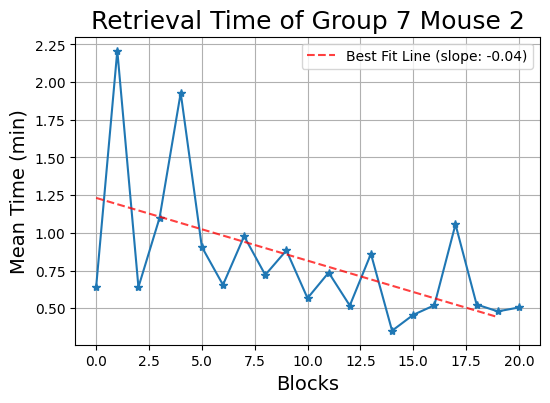

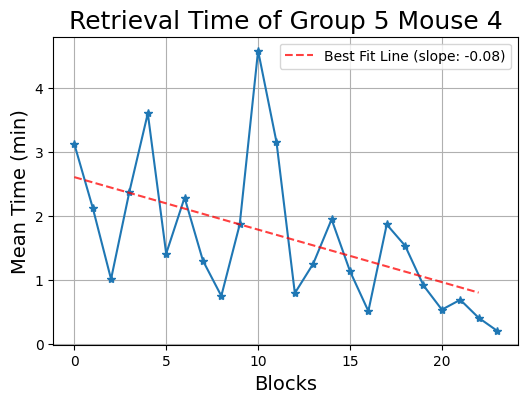

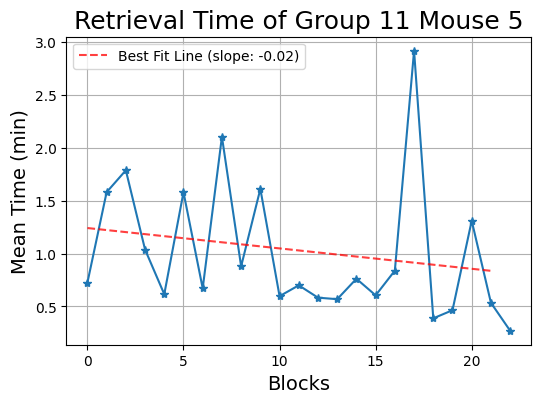

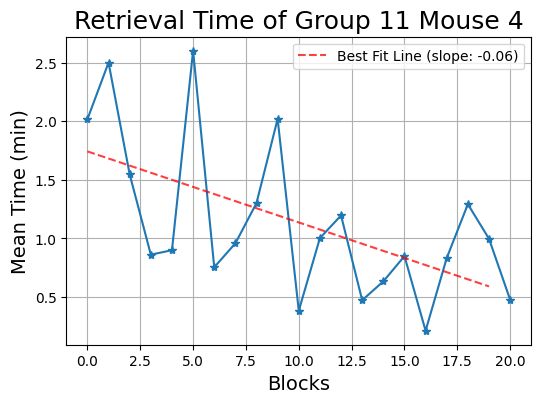

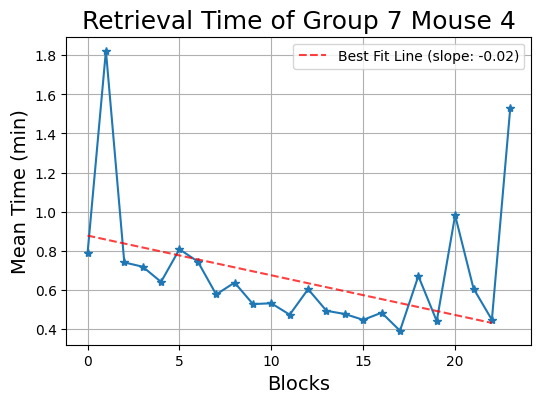

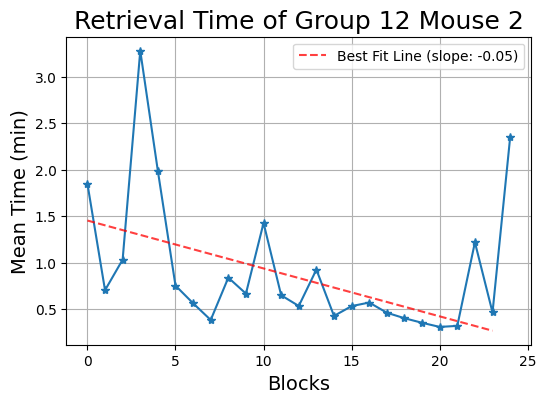

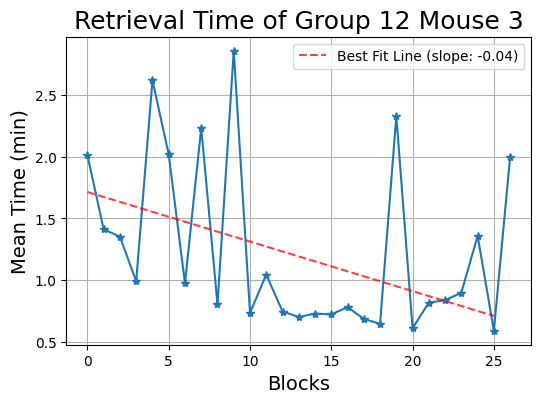

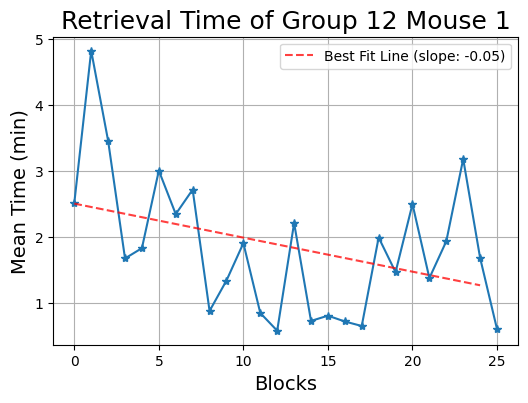

In [8]:
ctrl_all_times = []
ctrl_median = []
ctrl_stds = []
ctrl_pred = []
ctrl_slope = []

for sheet in ctrl_sheets[:]:
    times, mean, std = mean_pellet_collect_time(ctrl_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(ctrl_path, sheet, day=day, n_stds=3)
    ctrl_all_times.append(times)
    ctrl_median.append(mean)
    ctrl_stds.append(std)
    ctrl_pred.append(pred)
    ctrl_slope.append(slope)

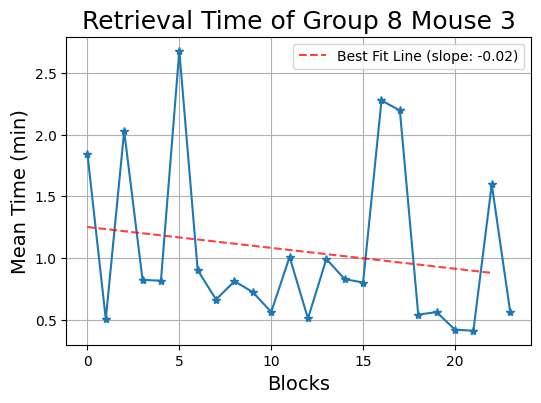

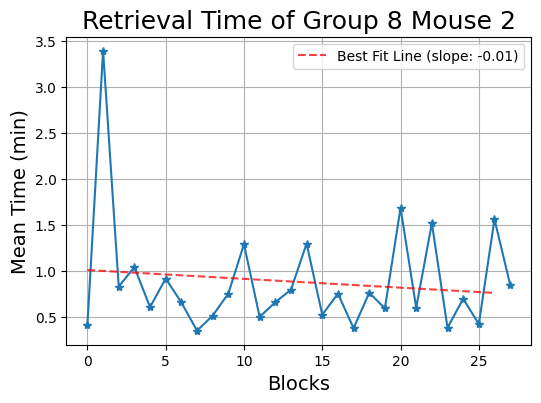

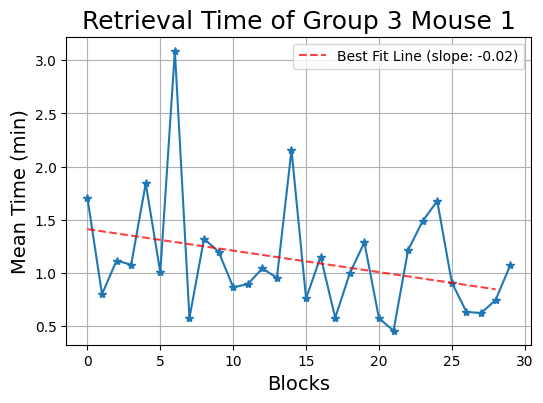

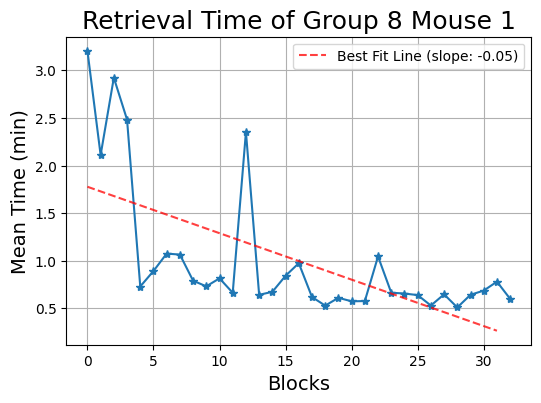

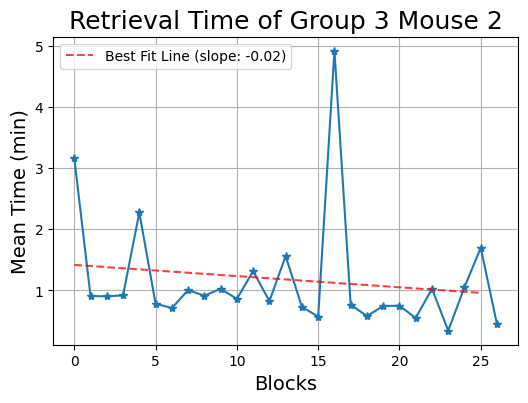

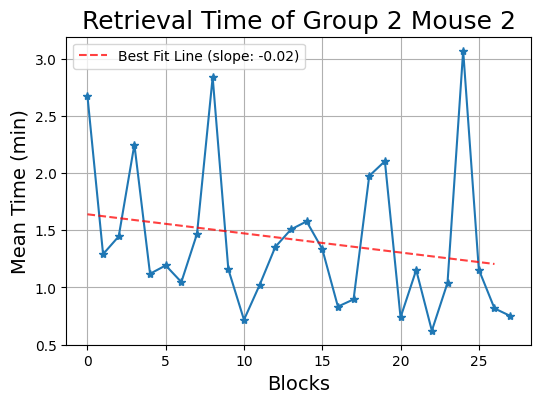

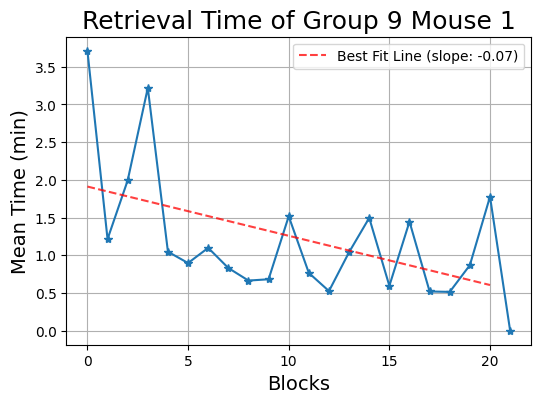

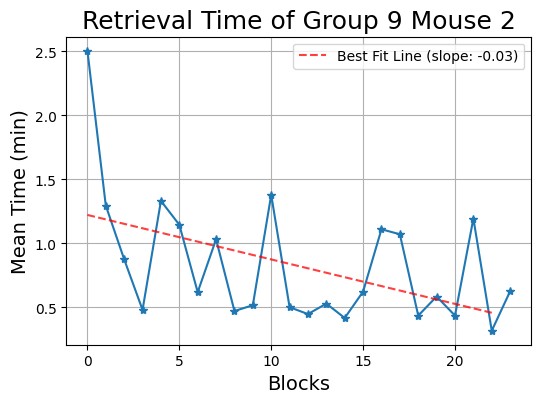

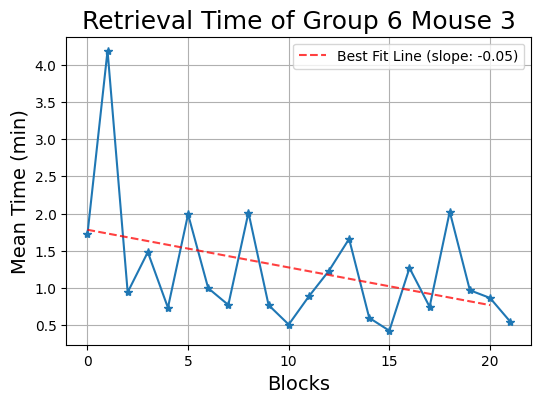

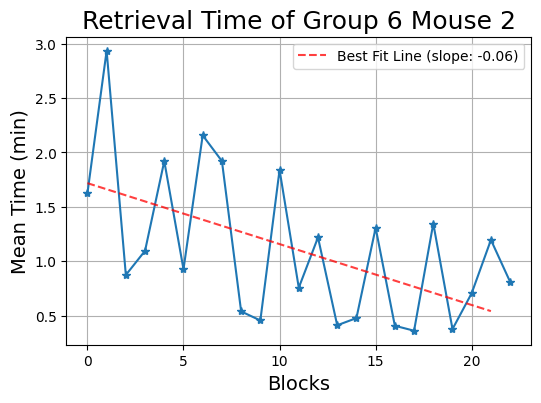

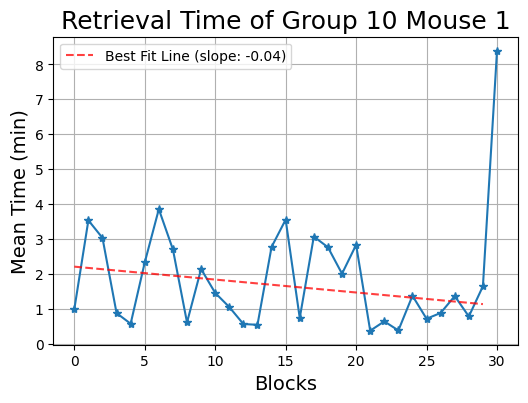

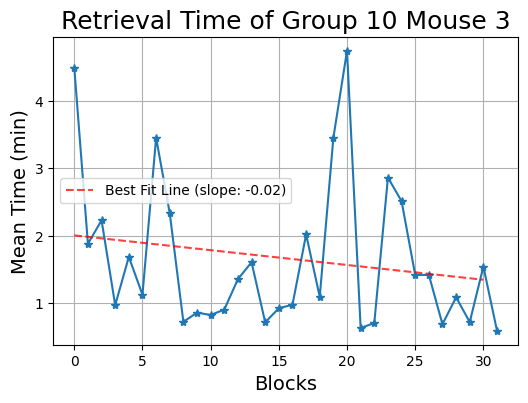

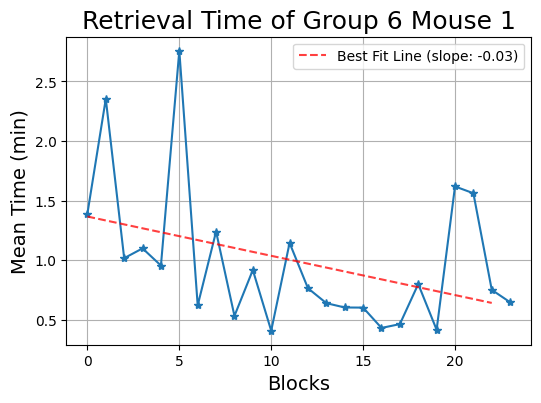

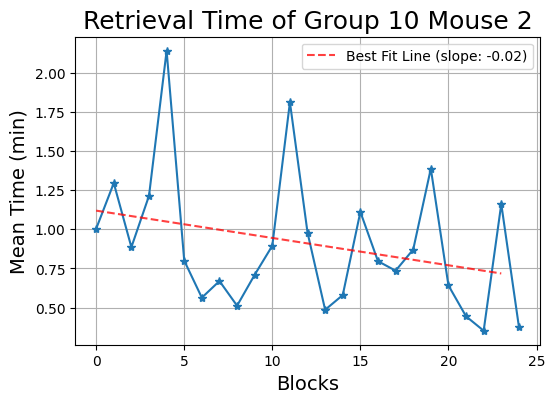

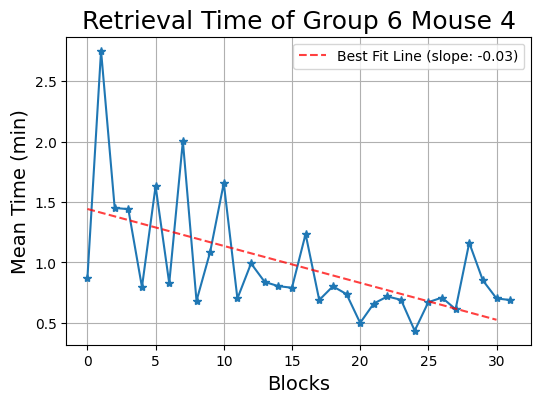

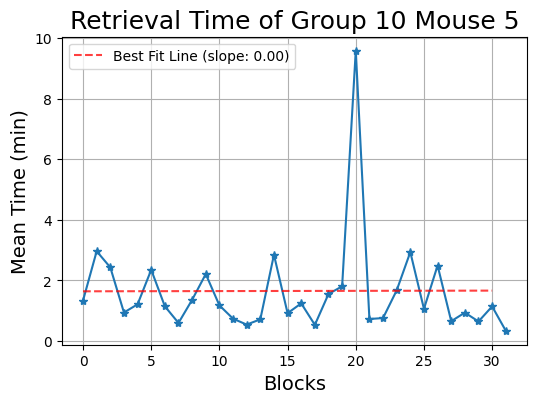

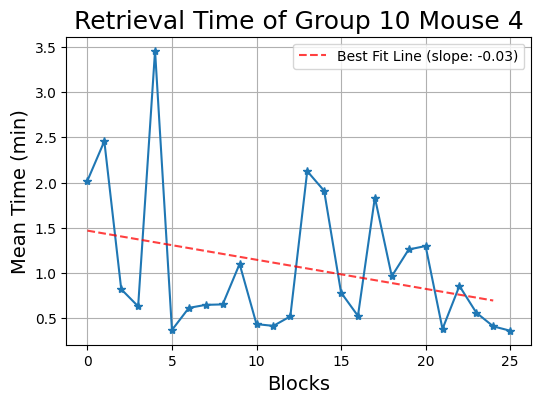

In [9]:
cask_all_times = []
cask_median = []
cask_stds = []
cask_pred = []
cask_slope= []

for sheet in cask_sheets[:]:
    times, mean, std = mean_pellet_collect_time(cask_path, sheet, remove_outlier=True, n_stds=3, day=day)
    _, pred, slope = plot_retrieval_time_by_block(cask_path, sheet, day=day, n_stds=3)
    cask_all_times.append(times)
    cask_median.append(mean)
    cask_stds.append(std)
    cask_pred.append(pred)
    cask_slope.append(slope)

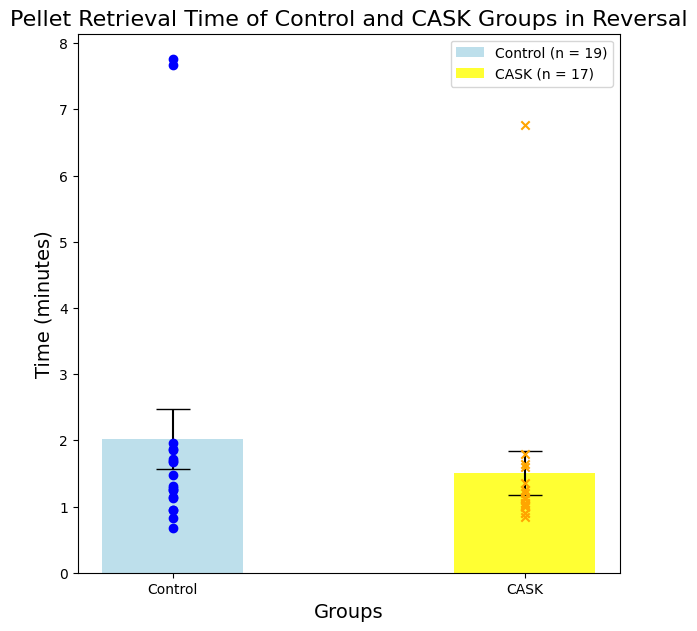

In [10]:
dit.graph_retrieval_time(ctrl_median, cask_median, exp_group_name='CASK', rev=True)

In [11]:
import intervals as invs

invs.perform_T_test(ctrl_median, cask_median, test_side='less')

P Value is  0.19294868145292815
There is no significant difference between the two groups.


In [12]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='less')

P Value is  0.24921541783690393
There is no significant difference between the two groups.


In [13]:
invs.perform_T_test(ctrl_slope, cask_slope, test_side='less')

P Value is  0.8067232531532192
There is no significant difference between the two groups.


In [14]:
invs.perform_T_test(ctrl_pred, cask_pred, test_side='less')

P Value is  0.02815602474198393
Experiment group is significantly less than control group


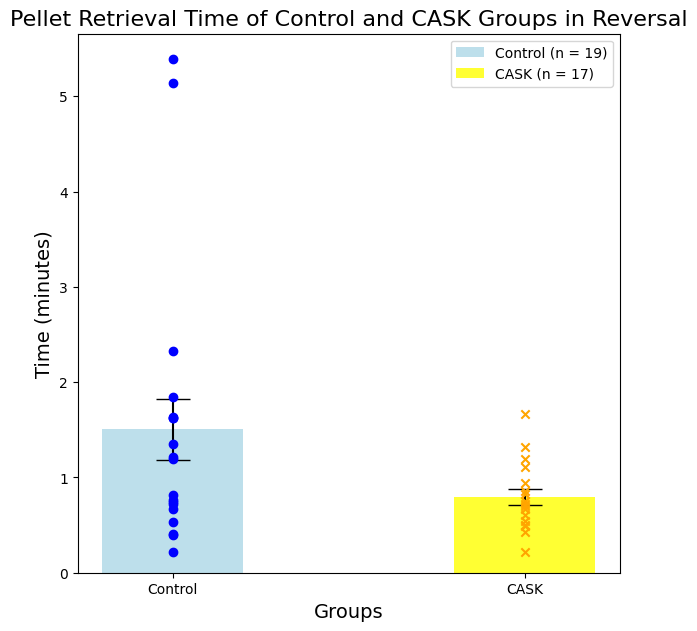

In [15]:
dit.graph_retrieval_time(ctrl_pred, cask_pred, exp_group_name='CASK', rev=True)

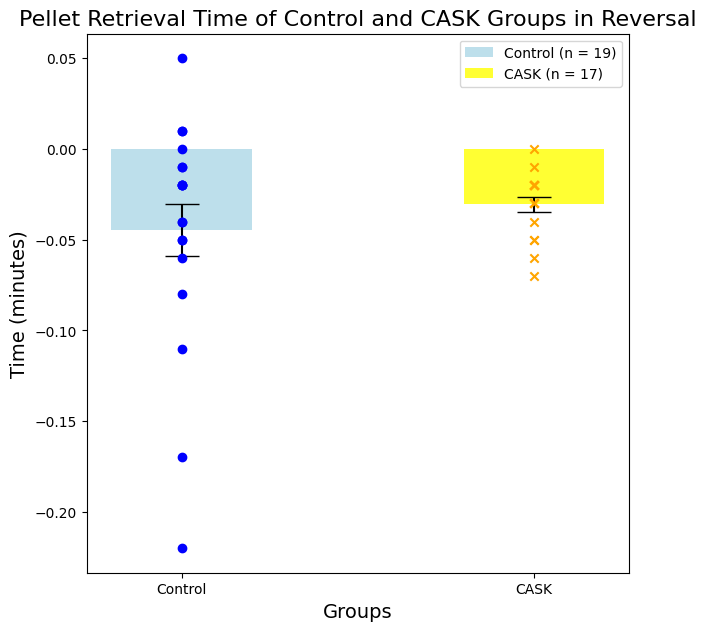

In [17]:
dit.graph_retrieval_time(ctrl_slope, cask_slope, exp_group_name='CASK', rev=True)

In [28]:
ctrl_all_times = []
ctrl_means = []
ctrl_stds = []

for sheet in ctrl_sheets:
    times, mean, std = mean_pellet_collect_time(ctrl_path, sheet, remove_outlier=True, n_stds=2, day=3)
    ctrl_all_times.append(times)
    ctrl_means.append(mean)
    ctrl_stds.append(std)

In [29]:
cask_all_times = []
cask_means = []
cask_stds = []

for sheet in cask_sheets:
    times, mean, std = mean_pellet_collect_time(cask_path, sheet, remove_outlier=True, n_stds=2, day=3)
    cask_all_times.append(times)
    cask_means.append(mean)
    cask_stds.append(std)

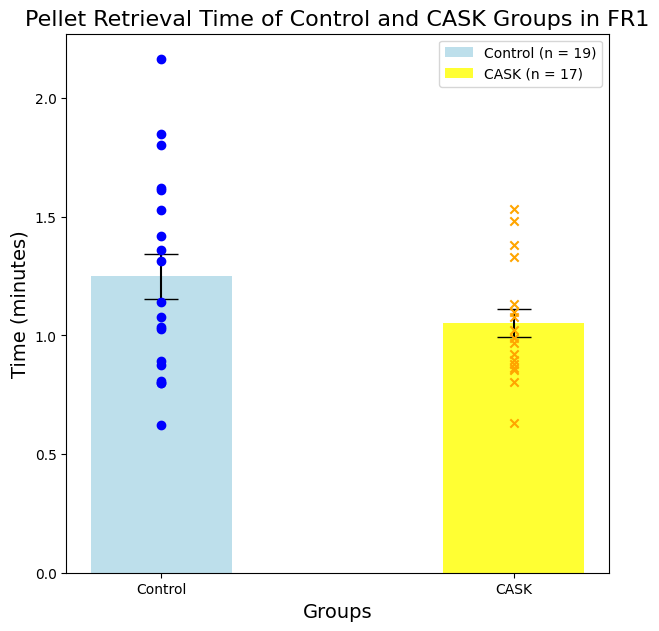

In [30]:
dit.graph_retrieval_time(ctrl_means, cask_means, exp_group_name='CASK', rev=False)

In [31]:
import intervals as invs

invs.perform_T_test(ctrl_means, cask_means, test_side='less')

P Value is  0.05160500651690731
There is no significant difference between the two groups.


In [32]:
invs.perform_T_test(ctrl_stds, cask_stds, test_side='less')

P Value is  0.1499909951019723
There is no significant difference between the two groups.


## Correlation

In [49]:
import numpy as np
import pickle

ctrl_acc, cask_acc = pickle.load(open('./ctrl_fr1_acc.pkl', 'rb'))
fr1_ctrl_sheet = get_all_sheet_names('../FR1_ctrl.xlsx')
fr1_cask_sheet = get_all_sheet_names('../FR1_cask.xlsx')

fr1_ctrl_dict = {fr1_ctrl_sheet[i]:ctrl_acc[i] for i in range(len(ctrl_acc))}
fr1_cask_dict = {fr1_cask_sheet[i]:cask_acc[i] for i in range(len(cask_acc))}

ctrl_retrieve_dict = {ctrl_sheets[i]:ctrl_means[i] for i in range(len(ctrl_sheets))}
cask_retrieve_dict = {cask_sheets[i]:cask_means[i] for i in range(len(cask_sheets))}

ctrl_new_acc = []
cask_new_acc = []
ctrl_new_means = []
cask_new_means = []
for sheet in np.intersect1d(fr1_ctrl_sheet, ctrl_sheets):
    ctrl_new_acc.append(fr1_ctrl_dict[sheet])
    ctrl_new_means.append(ctrl_retrieve_dict[sheet])
for sheet in np.intersect1d(fr1_cask_sheet, cask_sheets):
    cask_new_acc.append(fr1_cask_dict[sheet])
    cask_new_means.append(cask_retrieve_dict[sheet])

In [47]:
len(ctrl_acc), len(cask_acc)

(11, 9)

In [53]:
np.corrcoef(cask_new_acc, cask_new_means)[0, 1]

0.2917857413560015

In [54]:
np.corrcoef(ctrl_new_acc, ctrl_new_means)[0, 1]

-0.11395772798663906